### ISEN 613 (Engineering Data Analysis) Project

### Harnessing Solar Energy: A Statistical Analysis of Environmental Impact on Solar Power Sites

**Name and NetID:** Lakshminaga Bhvairisetti (charan_0112), Rohith Iruganti
(rohith.iruganti)

### Description

In this comprehensive study, we delve into the dynamic interplay between environmental variables and solar energy production. Utilizing a robust dataset from Sandia National Laboratories, this project aims to unravel the intricate narrative embedded within operational data from solar power sites. Our analysis encompasses an array of 38 variables, encompassing climatic factors, operational characteristics of solar plants, and environmental observations like snowfall and storms. This research is not just a mere academic exercise; it is an endeavor to translate complex data patterns into actionable insights, thereby contributing to the optimization of solar energy management and sustainability strategies.

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
import statsmodels.api as sm

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_curve, auc, classification_report
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import sklearn.model_selection as skm
import sklearn.linear_model as skl
from ISLP.models import \
     (Stepwise,
      sklearn_selected,
      sklearn_selection_path)
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import \
     (Stepwise,
      sklearn_selected,
      sklearn_selection_path)     
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from ISLP.models import ModelSpec as MS
from statsmodels.api import OLS


### Descriptive Analysis

Our analysis begins with a meticulous exploration of the dataset. Employing a correlation matrix and advanced visualization techniques like heatmaps, we aim to unearth underlying patterns and relationships among the 38 variables. This stage is crucial for identifying key factors that significantly influence solar energy output. By translating these complex interrelations into readable and informative visualizations, we provide a foundational understanding of how various environmental elements impact solar power generation.

**(I)Correlation Matrix**

                            randid      Date  NOAAClimRegion  TempZone  \
randid                    1.000000  0.353668        0.611874  0.072684   
Date                      0.353668  1.000000        0.398105 -0.034033   
NOAAClimRegion            0.611874  0.398105        1.000000 -0.031466   
TempZone                  0.072684 -0.034033       -0.031466  1.000000   
HumidZone                 0.137215  0.035280        0.257675  0.256099   
bin_PlantSize_kW          0.089946  0.062719        0.217535  0.213514   
plant_age_months          0.203096 -0.013937        0.125834  0.049958   
active_snow_tickets       0.158946  0.104679        0.162976 -0.039512   
snow_bin_ticket_minutes   0.156161  0.111122        0.161134 -0.038756   
snow_affected_assets      0.134383  0.070368        0.122525 -0.033197   
snow_production_level     0.129587  0.090626        0.148907 -0.032105   
PR                        0.703600  0.290663        0.453350  0.003127   
snow_value_mm             0.170573  0.

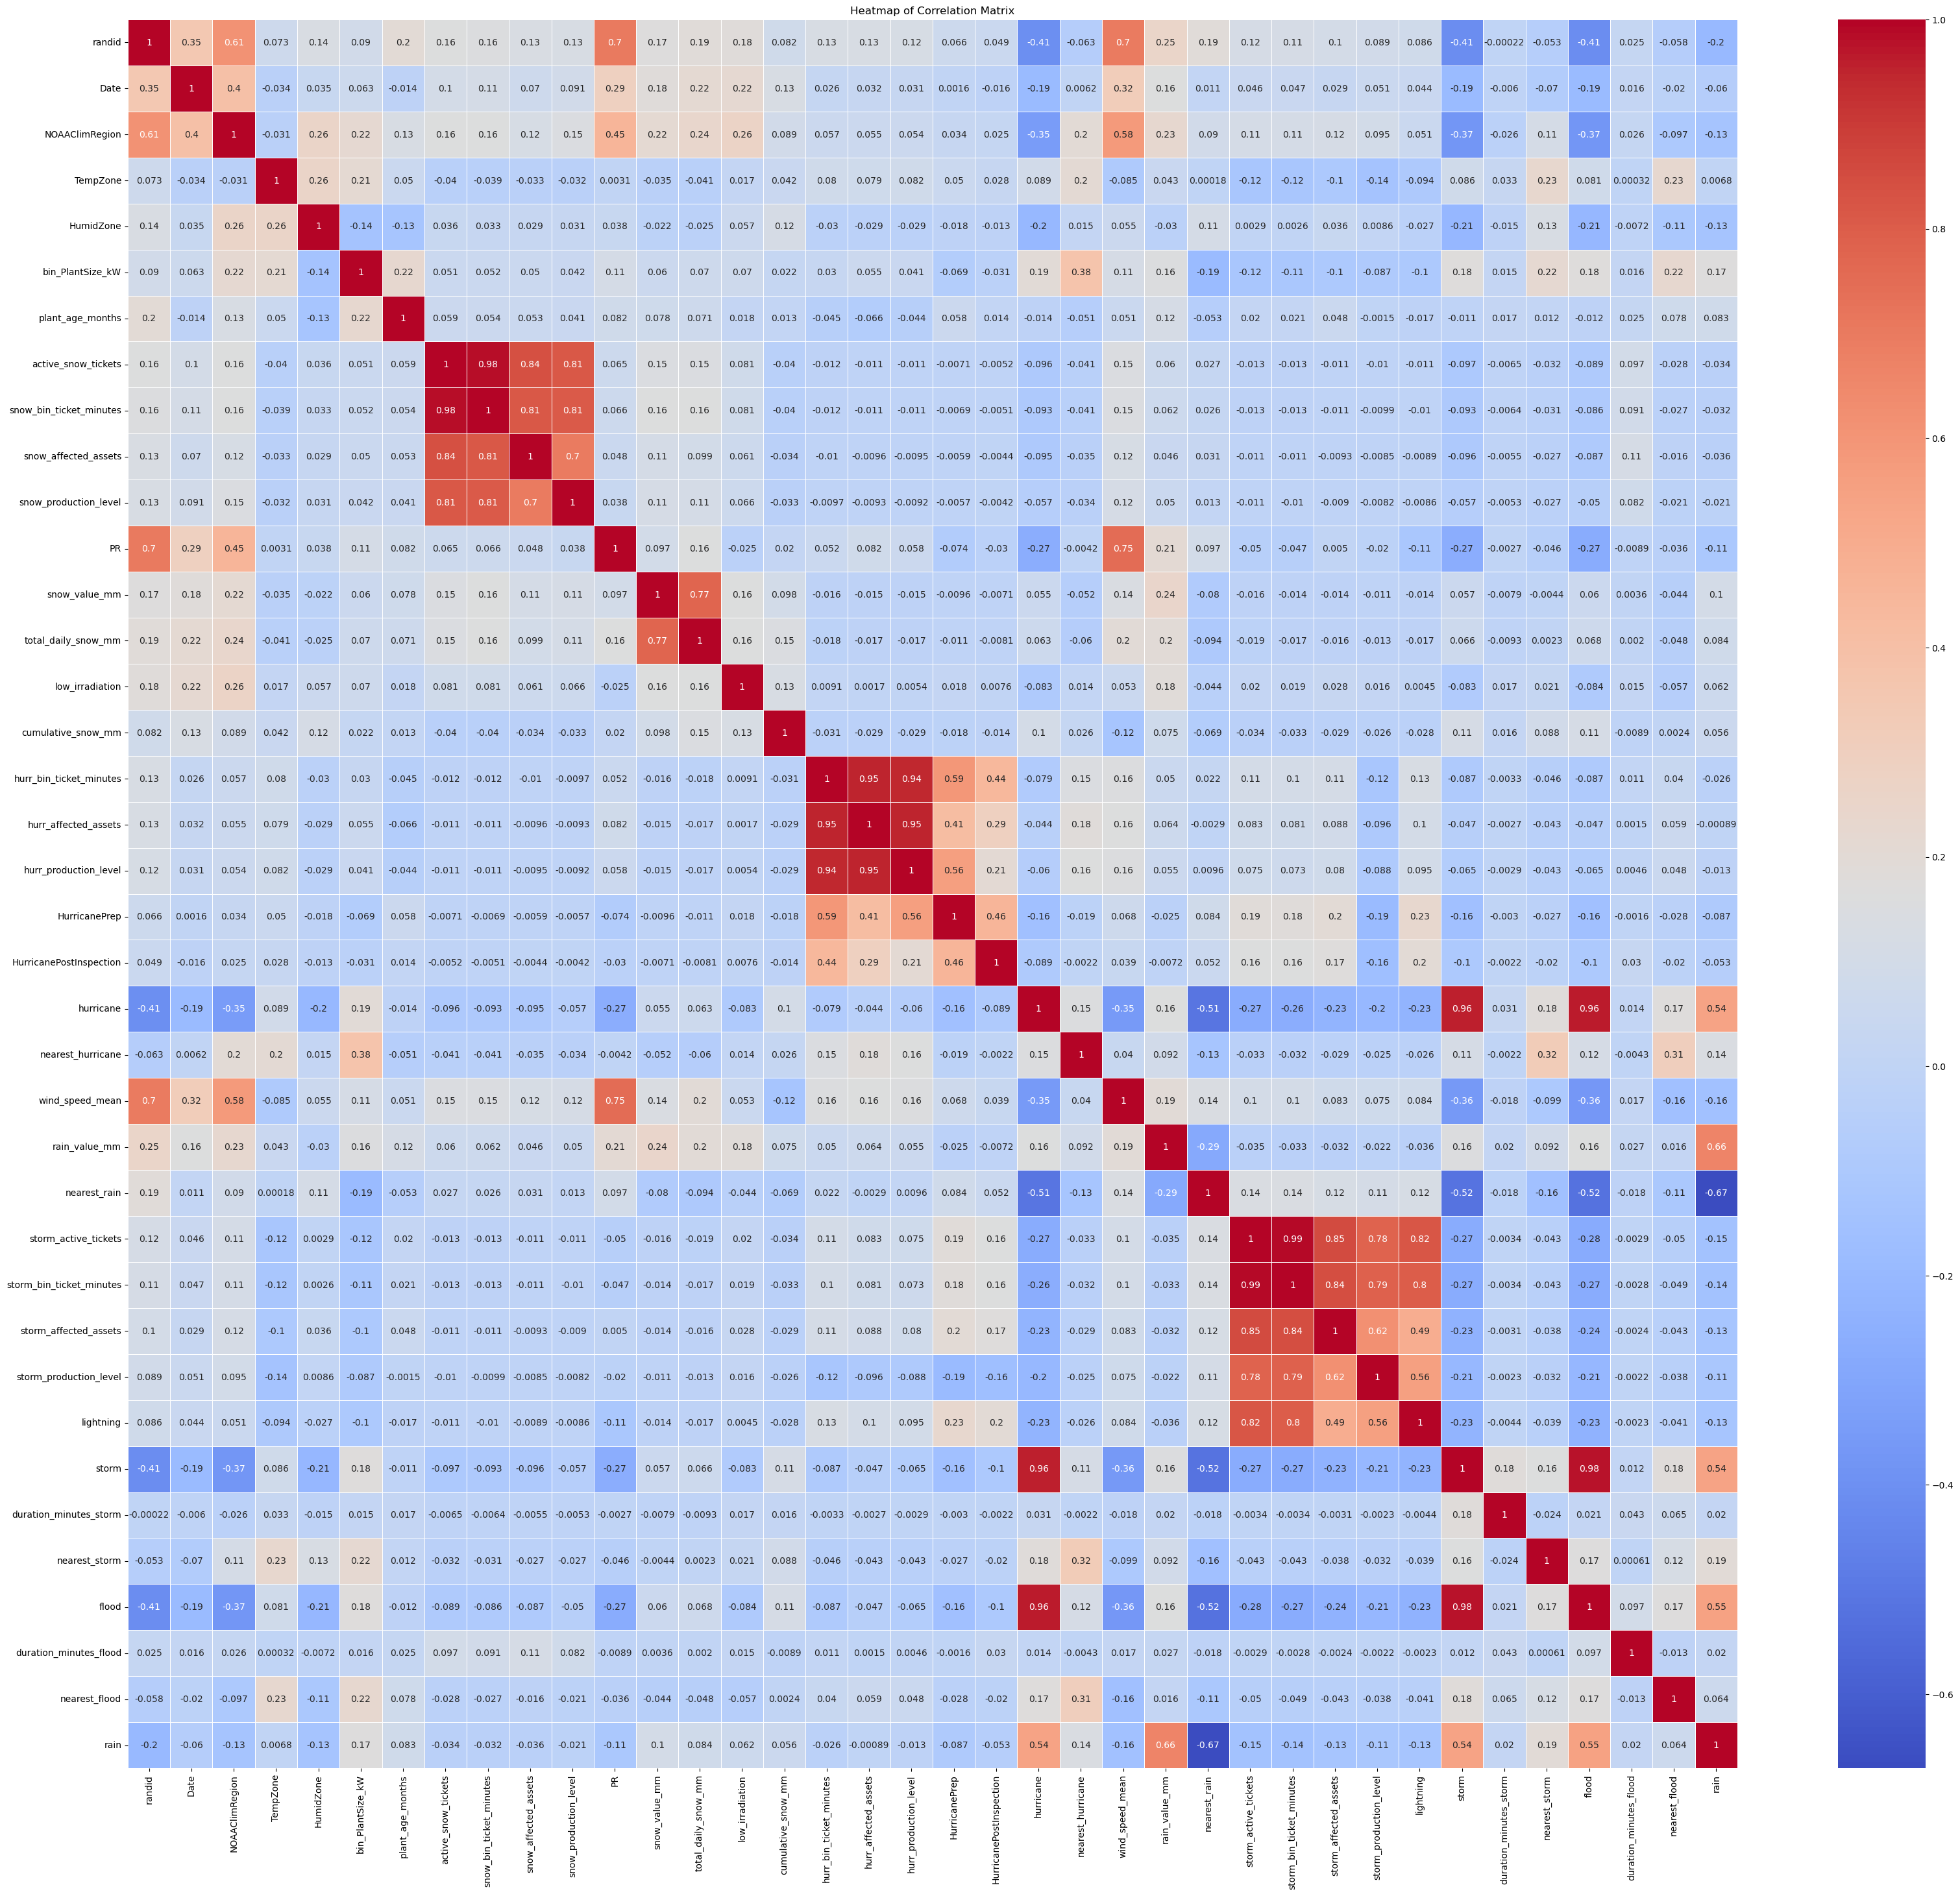

In [87]:
data = pd.read_csv('oedi_data.csv')
for column in data:
data[column] = pd.factorize(data[column])[0]
data = data[~data['wind_speed_mean'].astype(str).str.contains('#NUM!', na=False
# Generating the correlation matrix for all the predictors
correlation_matrix = data.corr()
print(correlation_matrix)
correlation_matrix.to_csv('correlation_mat.csv')
# plotting a heatmap for the above created correlation matrix
plt.figure(figsize=(40, 35))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Heatmap of Correlation Matrix")
plt.show()


**(II) Calculating VIF**

This block calculates VIF for each feature, identifying multicollinearity issues. It starts by adding a constant to the dataset '(add_constant(wd))' and then computes VIF values using a list comprehension within a DataFrame. The results are displayed and saved to a CSV file.

In [88]:
X = add_constant(data)
vif_df = pd.DataFrame()
vif_df['feature'] = X.columns
# Computing VIF for each predictor in the DataFrame
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape
print(vif_df)
vif_df.to_csv('vif_df.csv')


                     feature         VIF
0                      const   14.260974
1                     randid    3.662613
2                       Date    1.328839
3             NOAAClimRegion    2.698044
4                   TempZone    1.398547
5                  HumidZone    1.400771
6           bin_PlantSize_kW    1.490909
7           plant_age_months    1.228958
8        active_snow_tickets   32.050709
9    snow_bin_ticket_minutes   27.145401
10      snow_affected_assets    3.502197
11     snow_production_level    2.997915
12                        PR    3.366942
13             snow_value_mm    2.582929
14       total_daily_snow_mm    2.657938
15           low_irradiation    1.220739
16        cumulative_snow_mm    1.199651
17   hurr_bin_ticket_minutes   29.976353
18      hurr_affected_assets   32.312112
19     hurr_production_level   30.238733
20             HurricanePrep    5.144702
21   HurricanePostInspection    2.987621
22                 hurricane   16.943588
23         neare

**Dropping Predictors**


In [89]:
# Removing specific predictors from the above analysis from VIF and Correlation matrix
data = data.drop(columns=['randid', 'snow_value_mm','snow_affected_assets', 'snow_print(data)


       HumidZone  plant_age_months  active_snow_tickets     PR  \
0              0                 0                    0      0   
1              0                 0                    0      1   
2              0                 0                    0      2   
3              0                 0                    0      3   
4              0                 0                    0      4   
...          ...               ...                  ...    ...   
51499          0                12                    0  43591   
51500          0                12                    0  43592   
51501          0                12                    0  43593   
51502          0                12                    0  43594   
51503          0                12                    0  43595   

       total_daily_snow_mm  low_irradiation  cumulative_snow_mm  \
0                        0                0                   0   
1                        0                0                   0   
2     

In [90]:
# Add an intercept for VIF calculation
X = add_constant(data)

# Initialize DataFrame to store VIF values
vif_df = pd.DataFrame()
vif_df['feature'] = X.columns

# Compute VIF for each feature in the DataFrame
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display and save the VIF values
print(vif_df)


                     feature       VIF
0                      const  9.054587
1                  HumidZone  1.135902
2           plant_age_months  1.073494
3        active_snow_tickets  1.071765
4                         PR  2.707121
5        total_daily_snow_mm  1.170705
6            low_irradiation  1.119946
7         cumulative_snow_mm  1.138736
8      hurr_production_level  1.598011
9              HurricanePrep  1.916637
10   HurricanePostInspection  1.284928
11                 hurricane  1.966970
12         nearest_hurricane  1.344355
13           wind_speed_mean  3.006747
14             rain_value_mm  2.627808
15              nearest_rain  2.118085
16  storm_bin_ticket_minutes  1.152226
17    duration_minutes_storm  1.009680
18             nearest_storm  1.215509
19    duration_minutes_flood  1.015565
20             nearest_flood  1.220014
21                      rain  4.309361


**Imputing**

The displayed code is utilizing the `SimpleImputer` class from the scikit-learn library to handle missing data in a dataset. The imputation strategy specified is to replace missing values with the mean of each respective column. After applying this strategy, the dataset is updated so that any previously missing values are now filled with the mean of their column, thus maintaining the dataset's integrity for further analysis or modeling.

In [52]:
from sklearn.impute import SimpleImputer
#Using SimpleImputer function to impute missing values
imputer = SimpleImputer(strategy='mean')
wd = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
print(wd)

       HumidZone  plant_age_months  active_snow_tickets       PR  \
0            0.0               0.0                  0.0      0.0   
1            0.0               0.0                  0.0      1.0   
2            0.0               0.0                  0.0      2.0   
3            0.0               0.0                  0.0      3.0   
4            0.0               0.0                  0.0      4.0   
...          ...               ...                  ...      ...   
51499        0.0              12.0                  0.0  43591.0   
51500        0.0              12.0                  0.0  43592.0   
51501        0.0              12.0                  0.0  43593.0   
51502        0.0              12.0                  0.0  43594.0   
51503        0.0              12.0                  0.0  43595.0   

       total_daily_snow_mm  low_irradiation  cumulative_snow_mm  \
0                      0.0              0.0                 0.0   
1                      0.0              0.0      

### Comprehensive Data Distribution and Relationship Analysis in Solar Irradiation Dataset

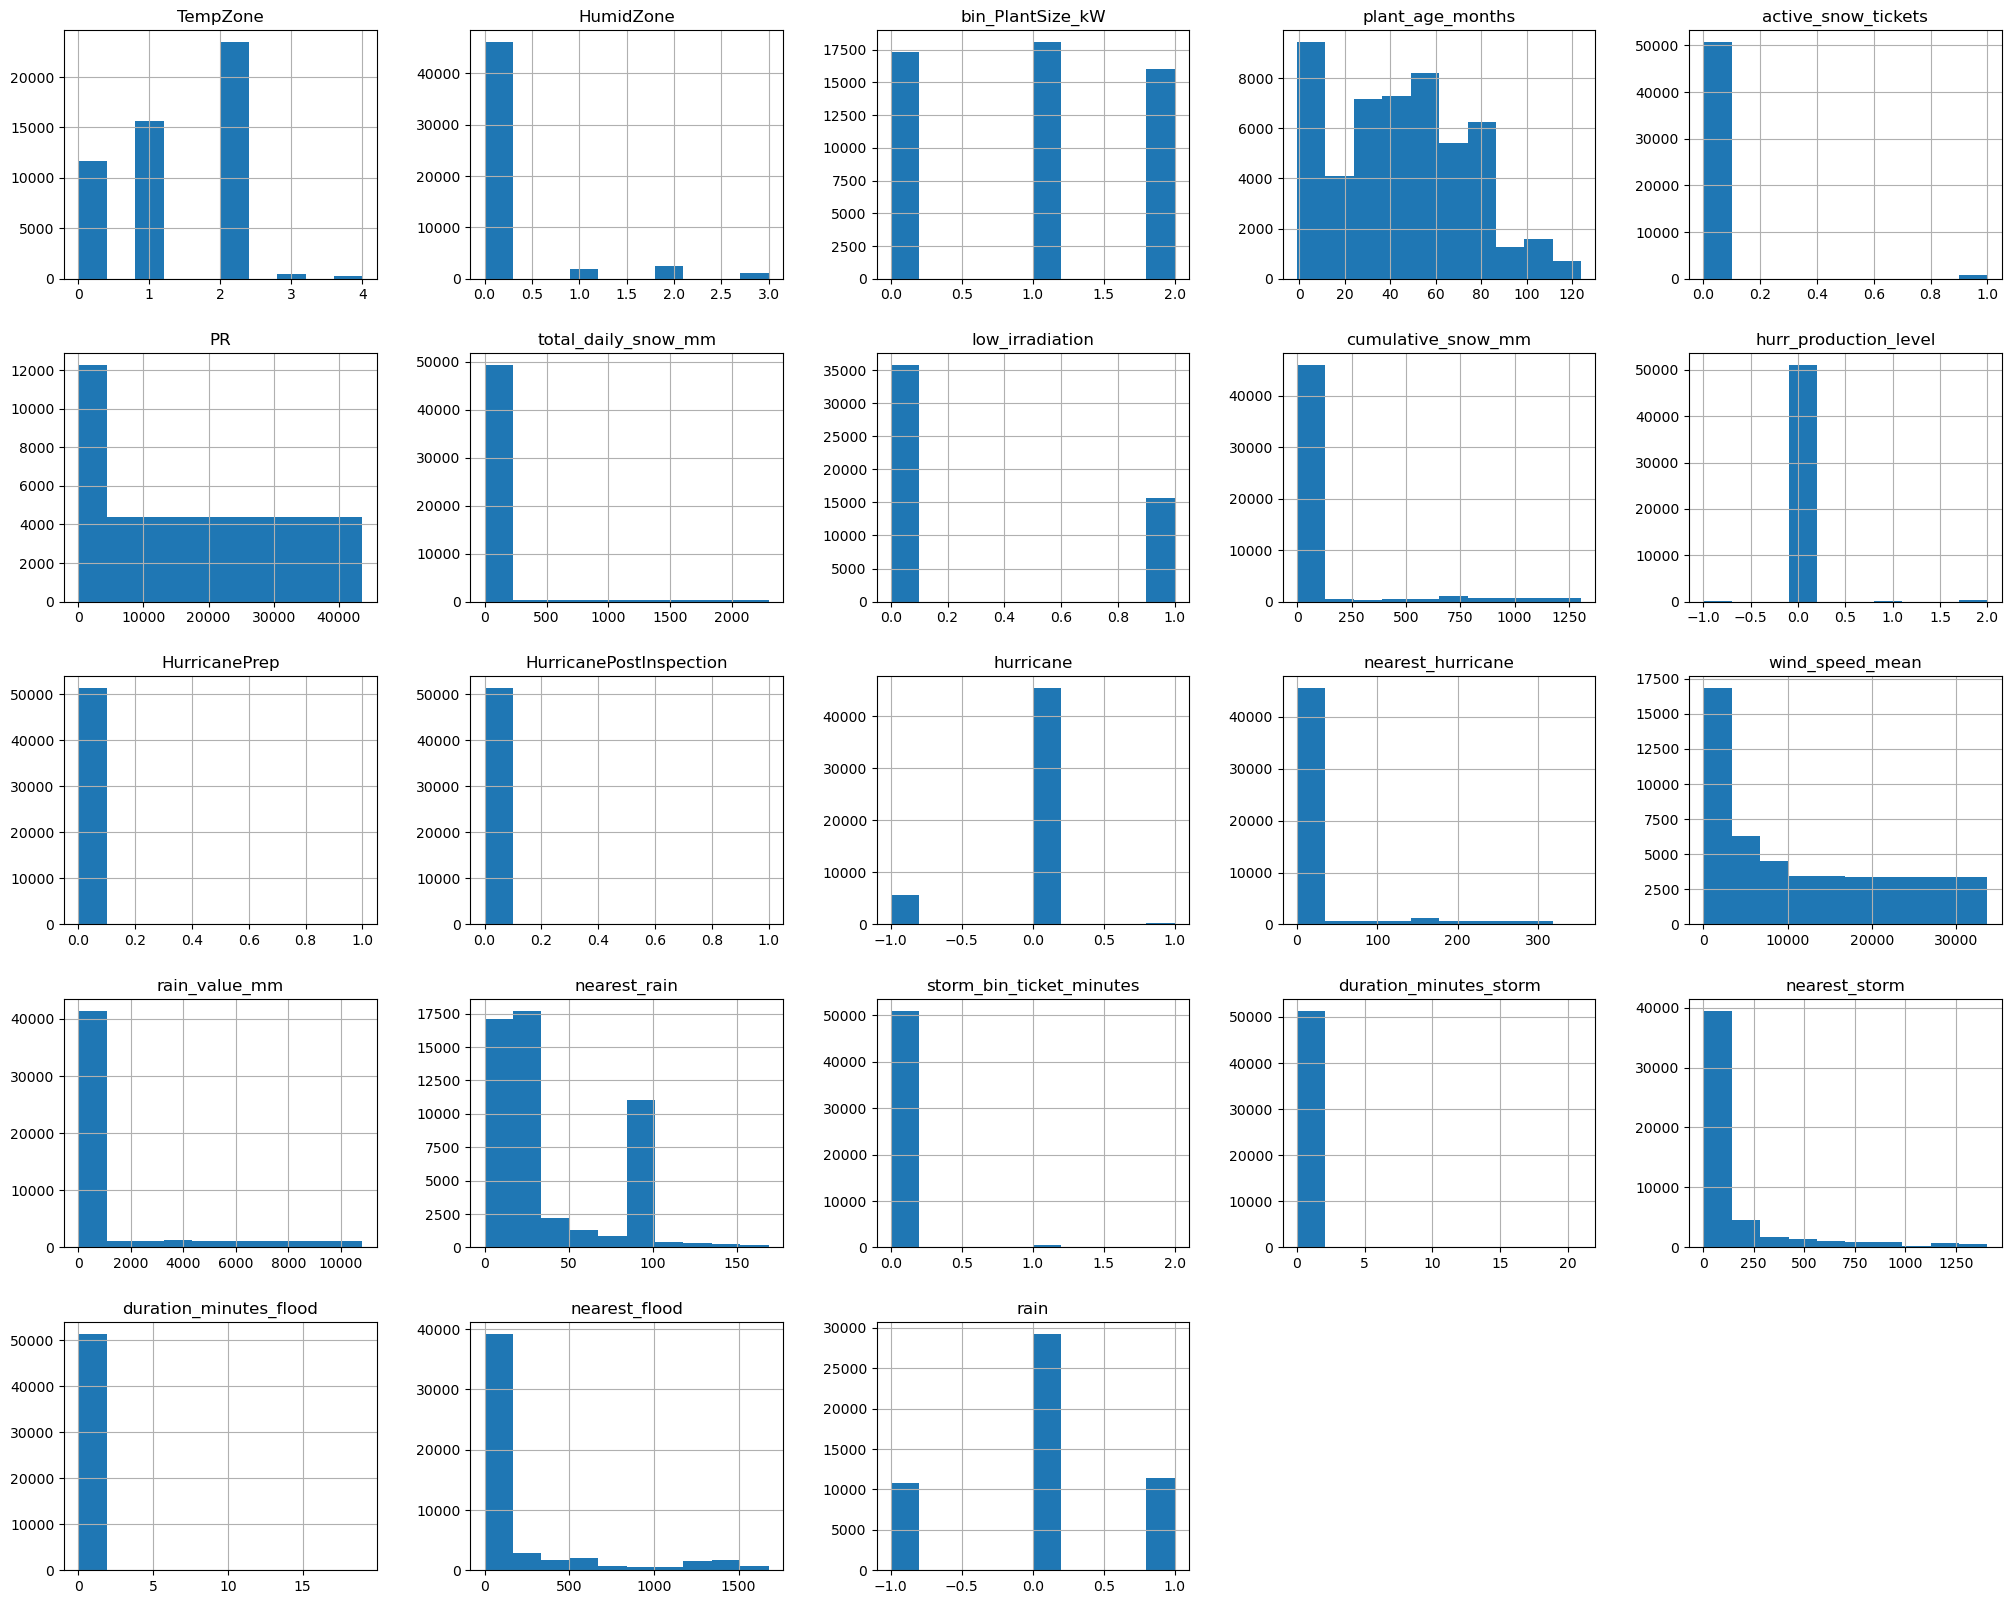

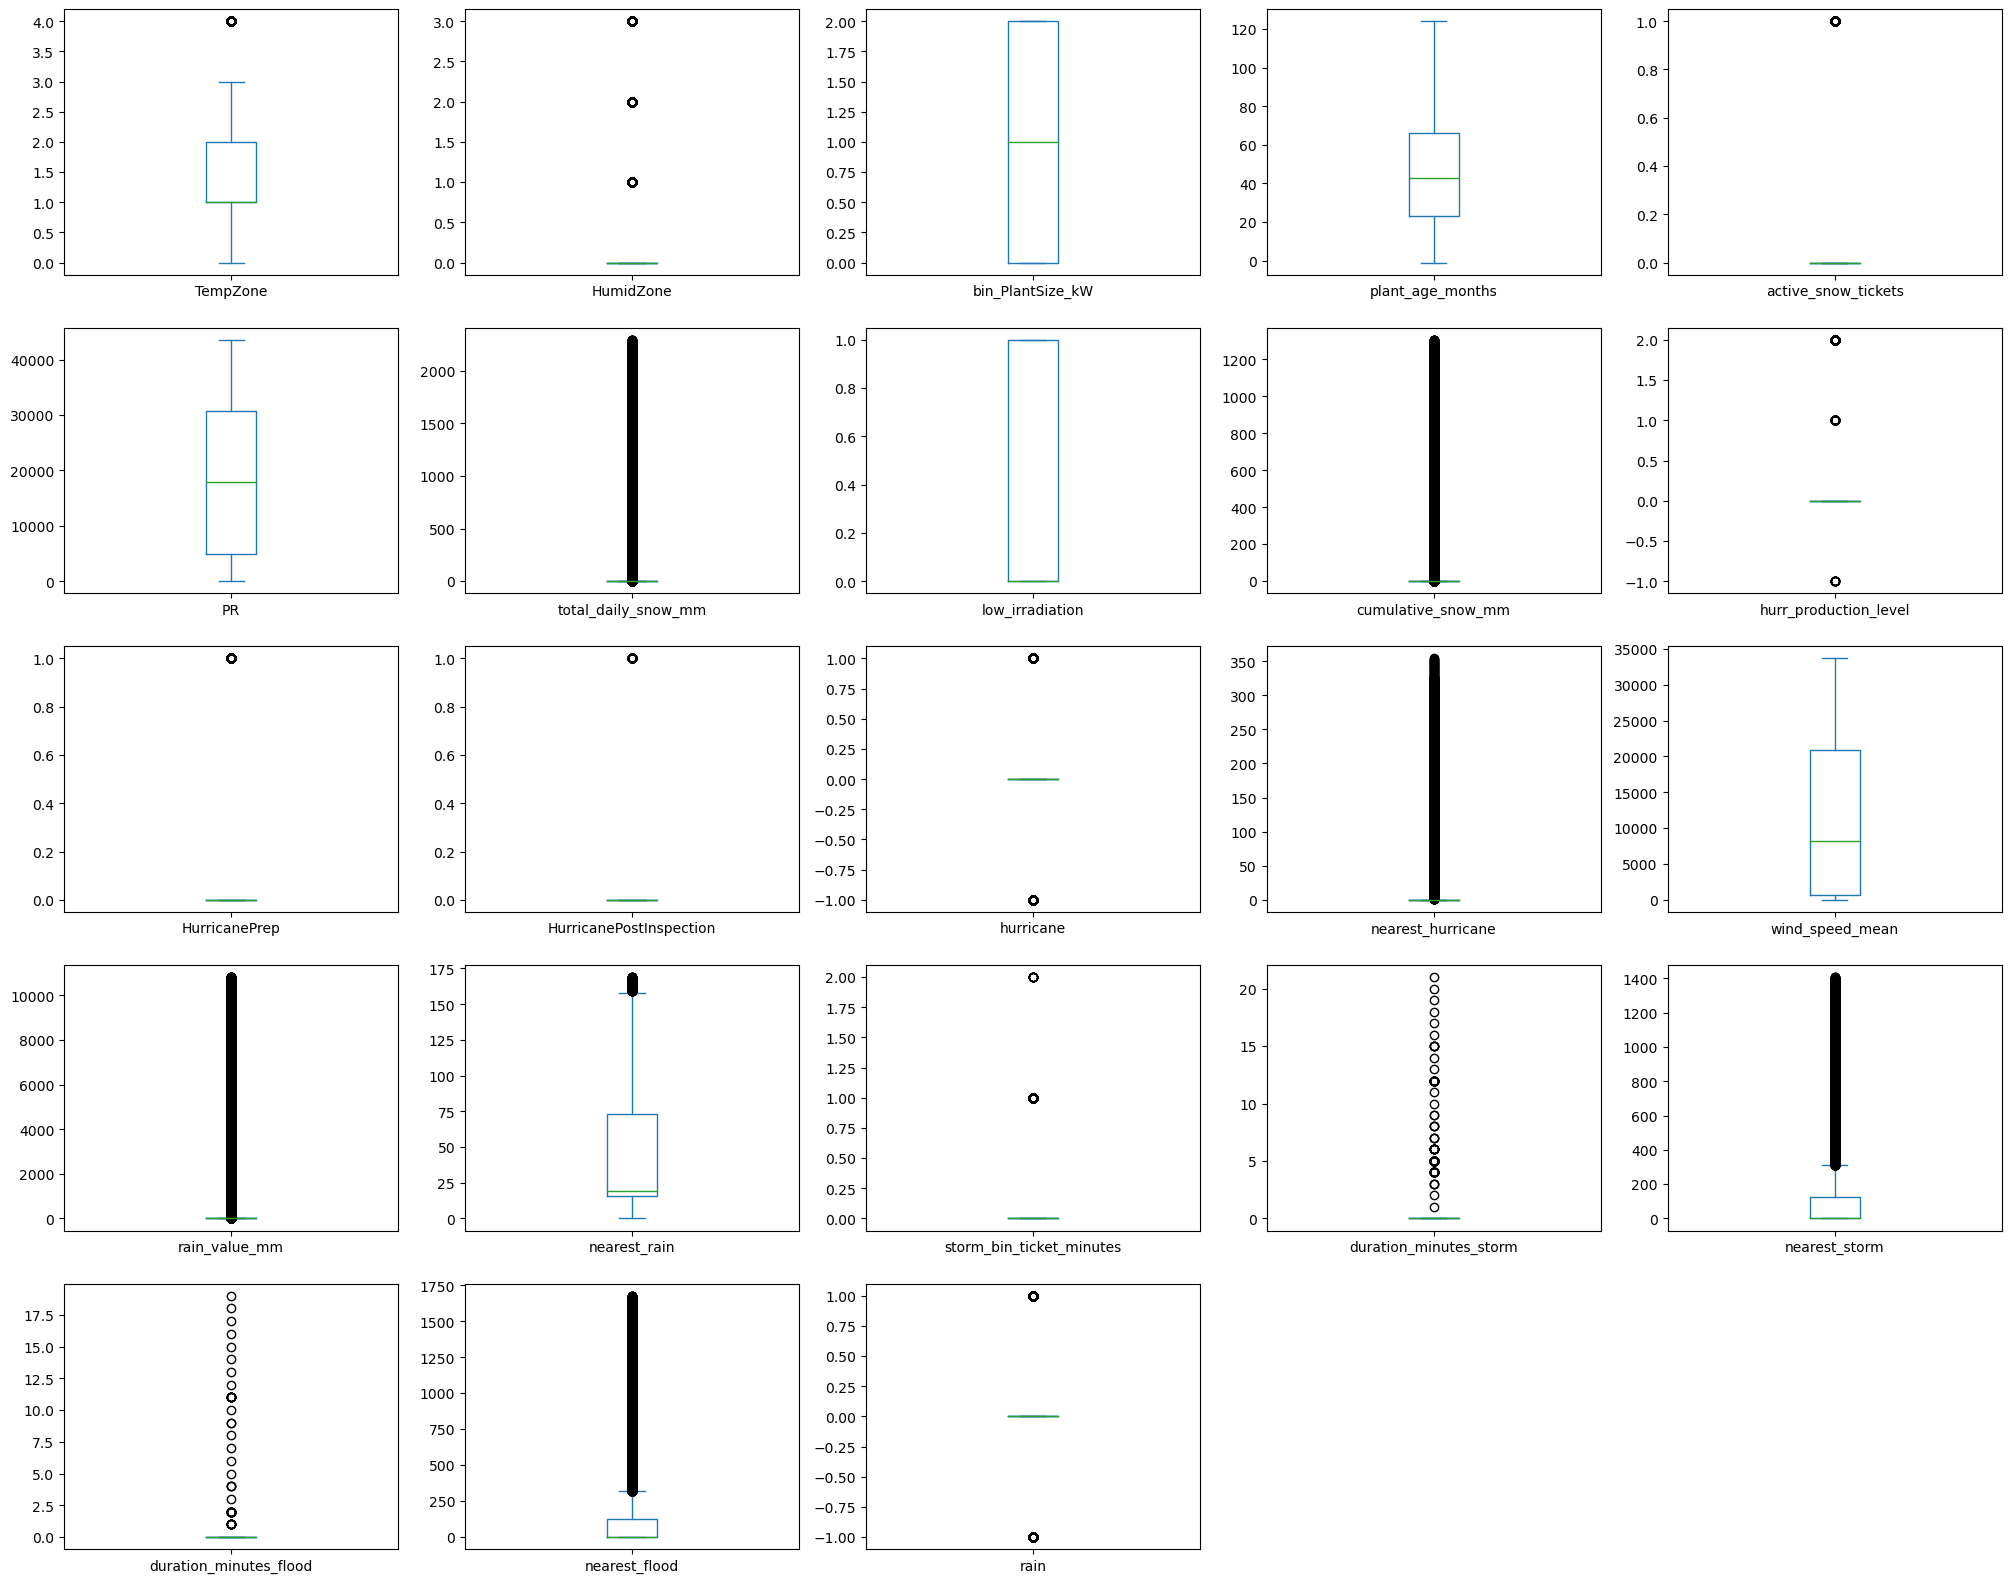

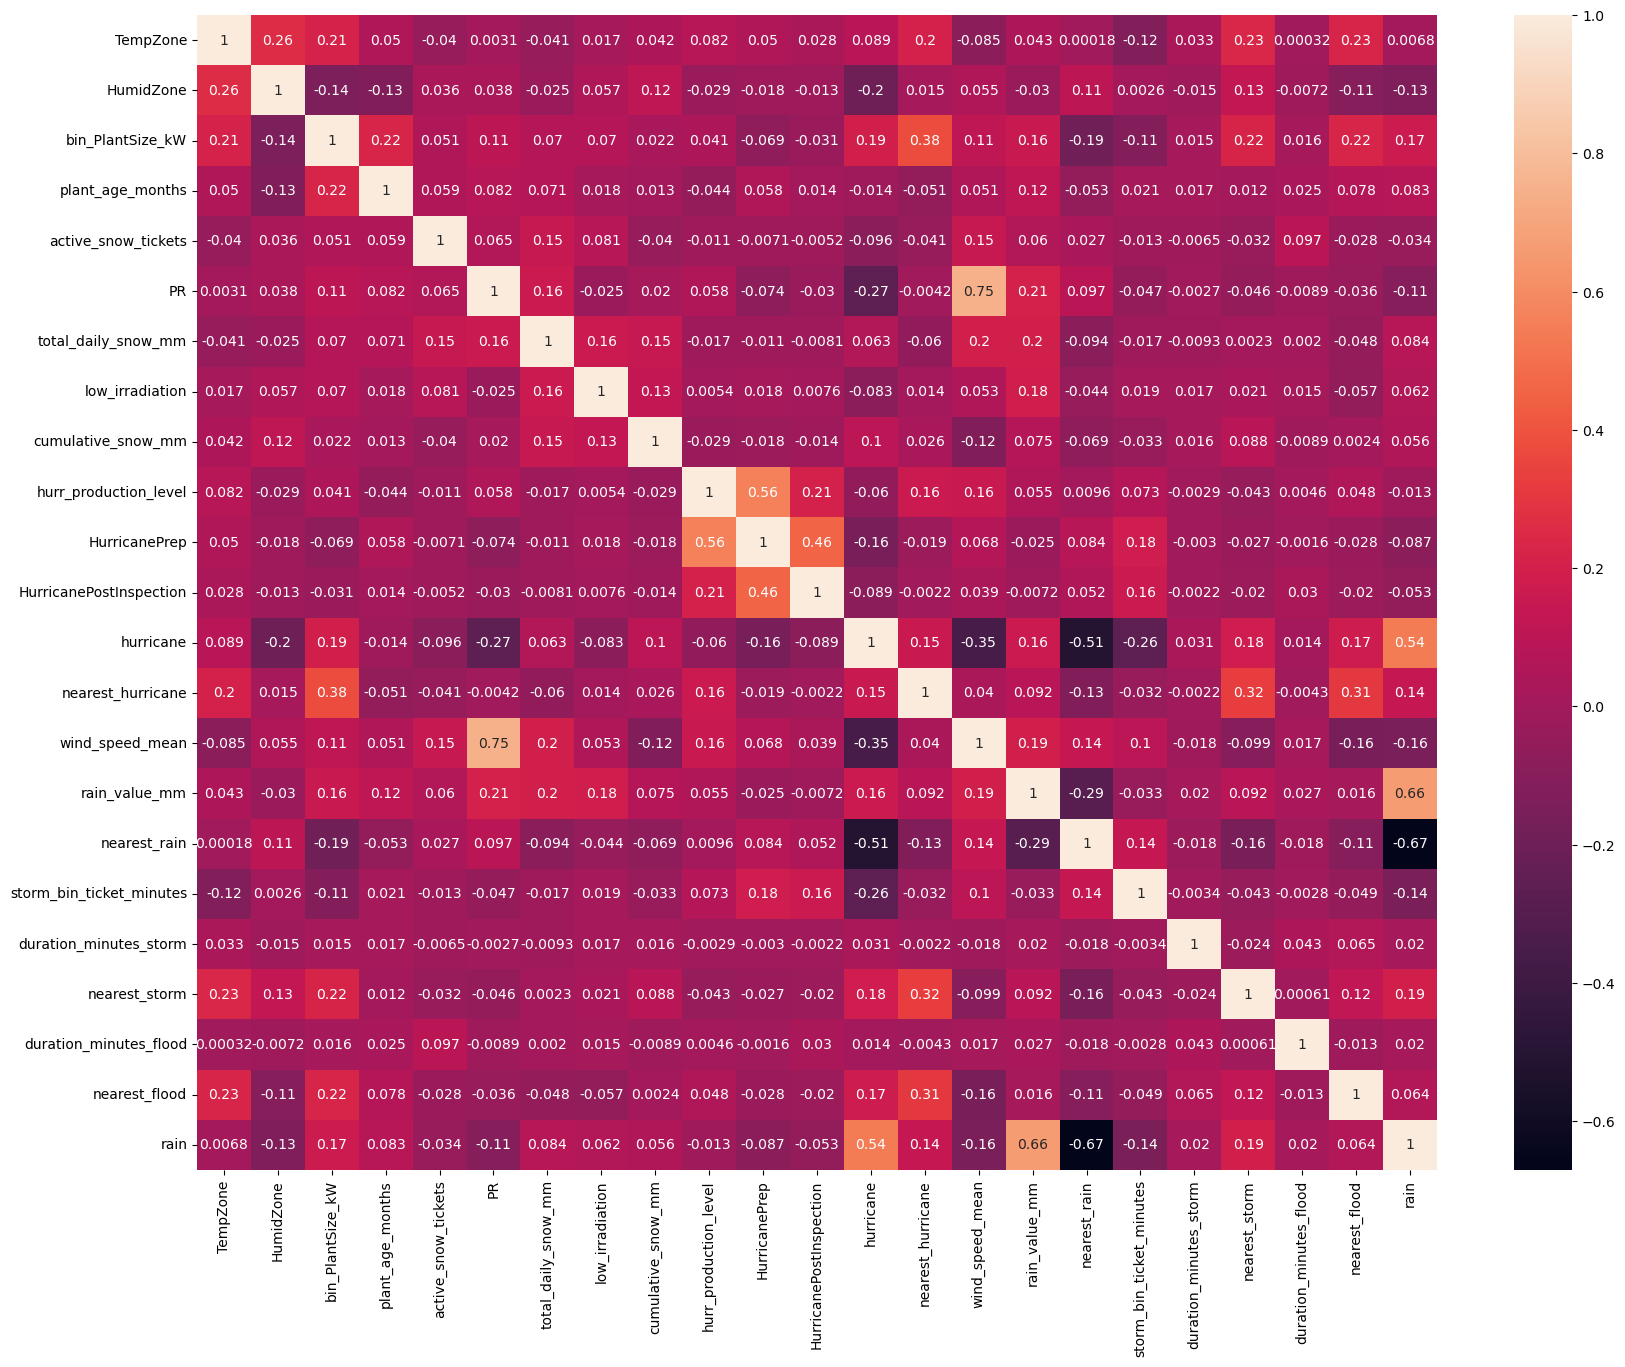

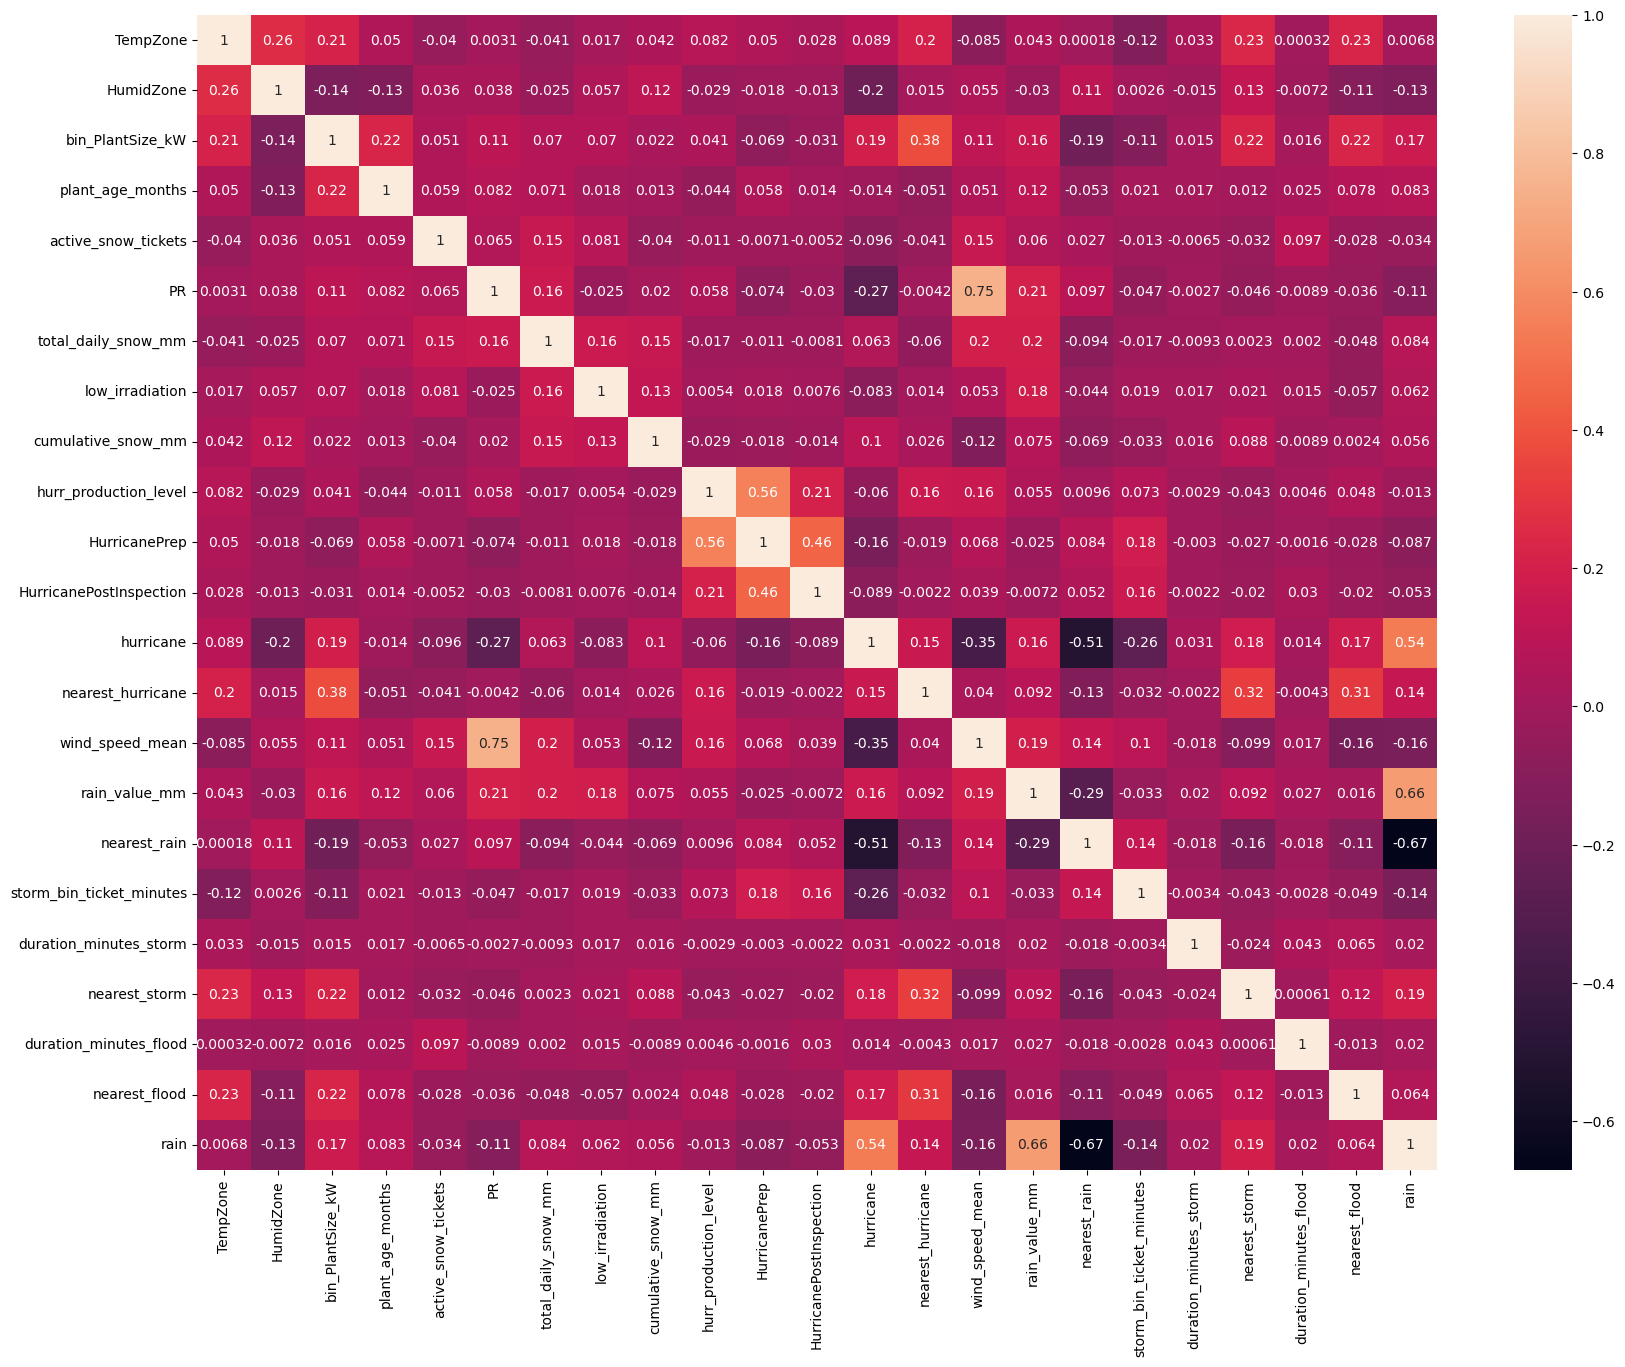

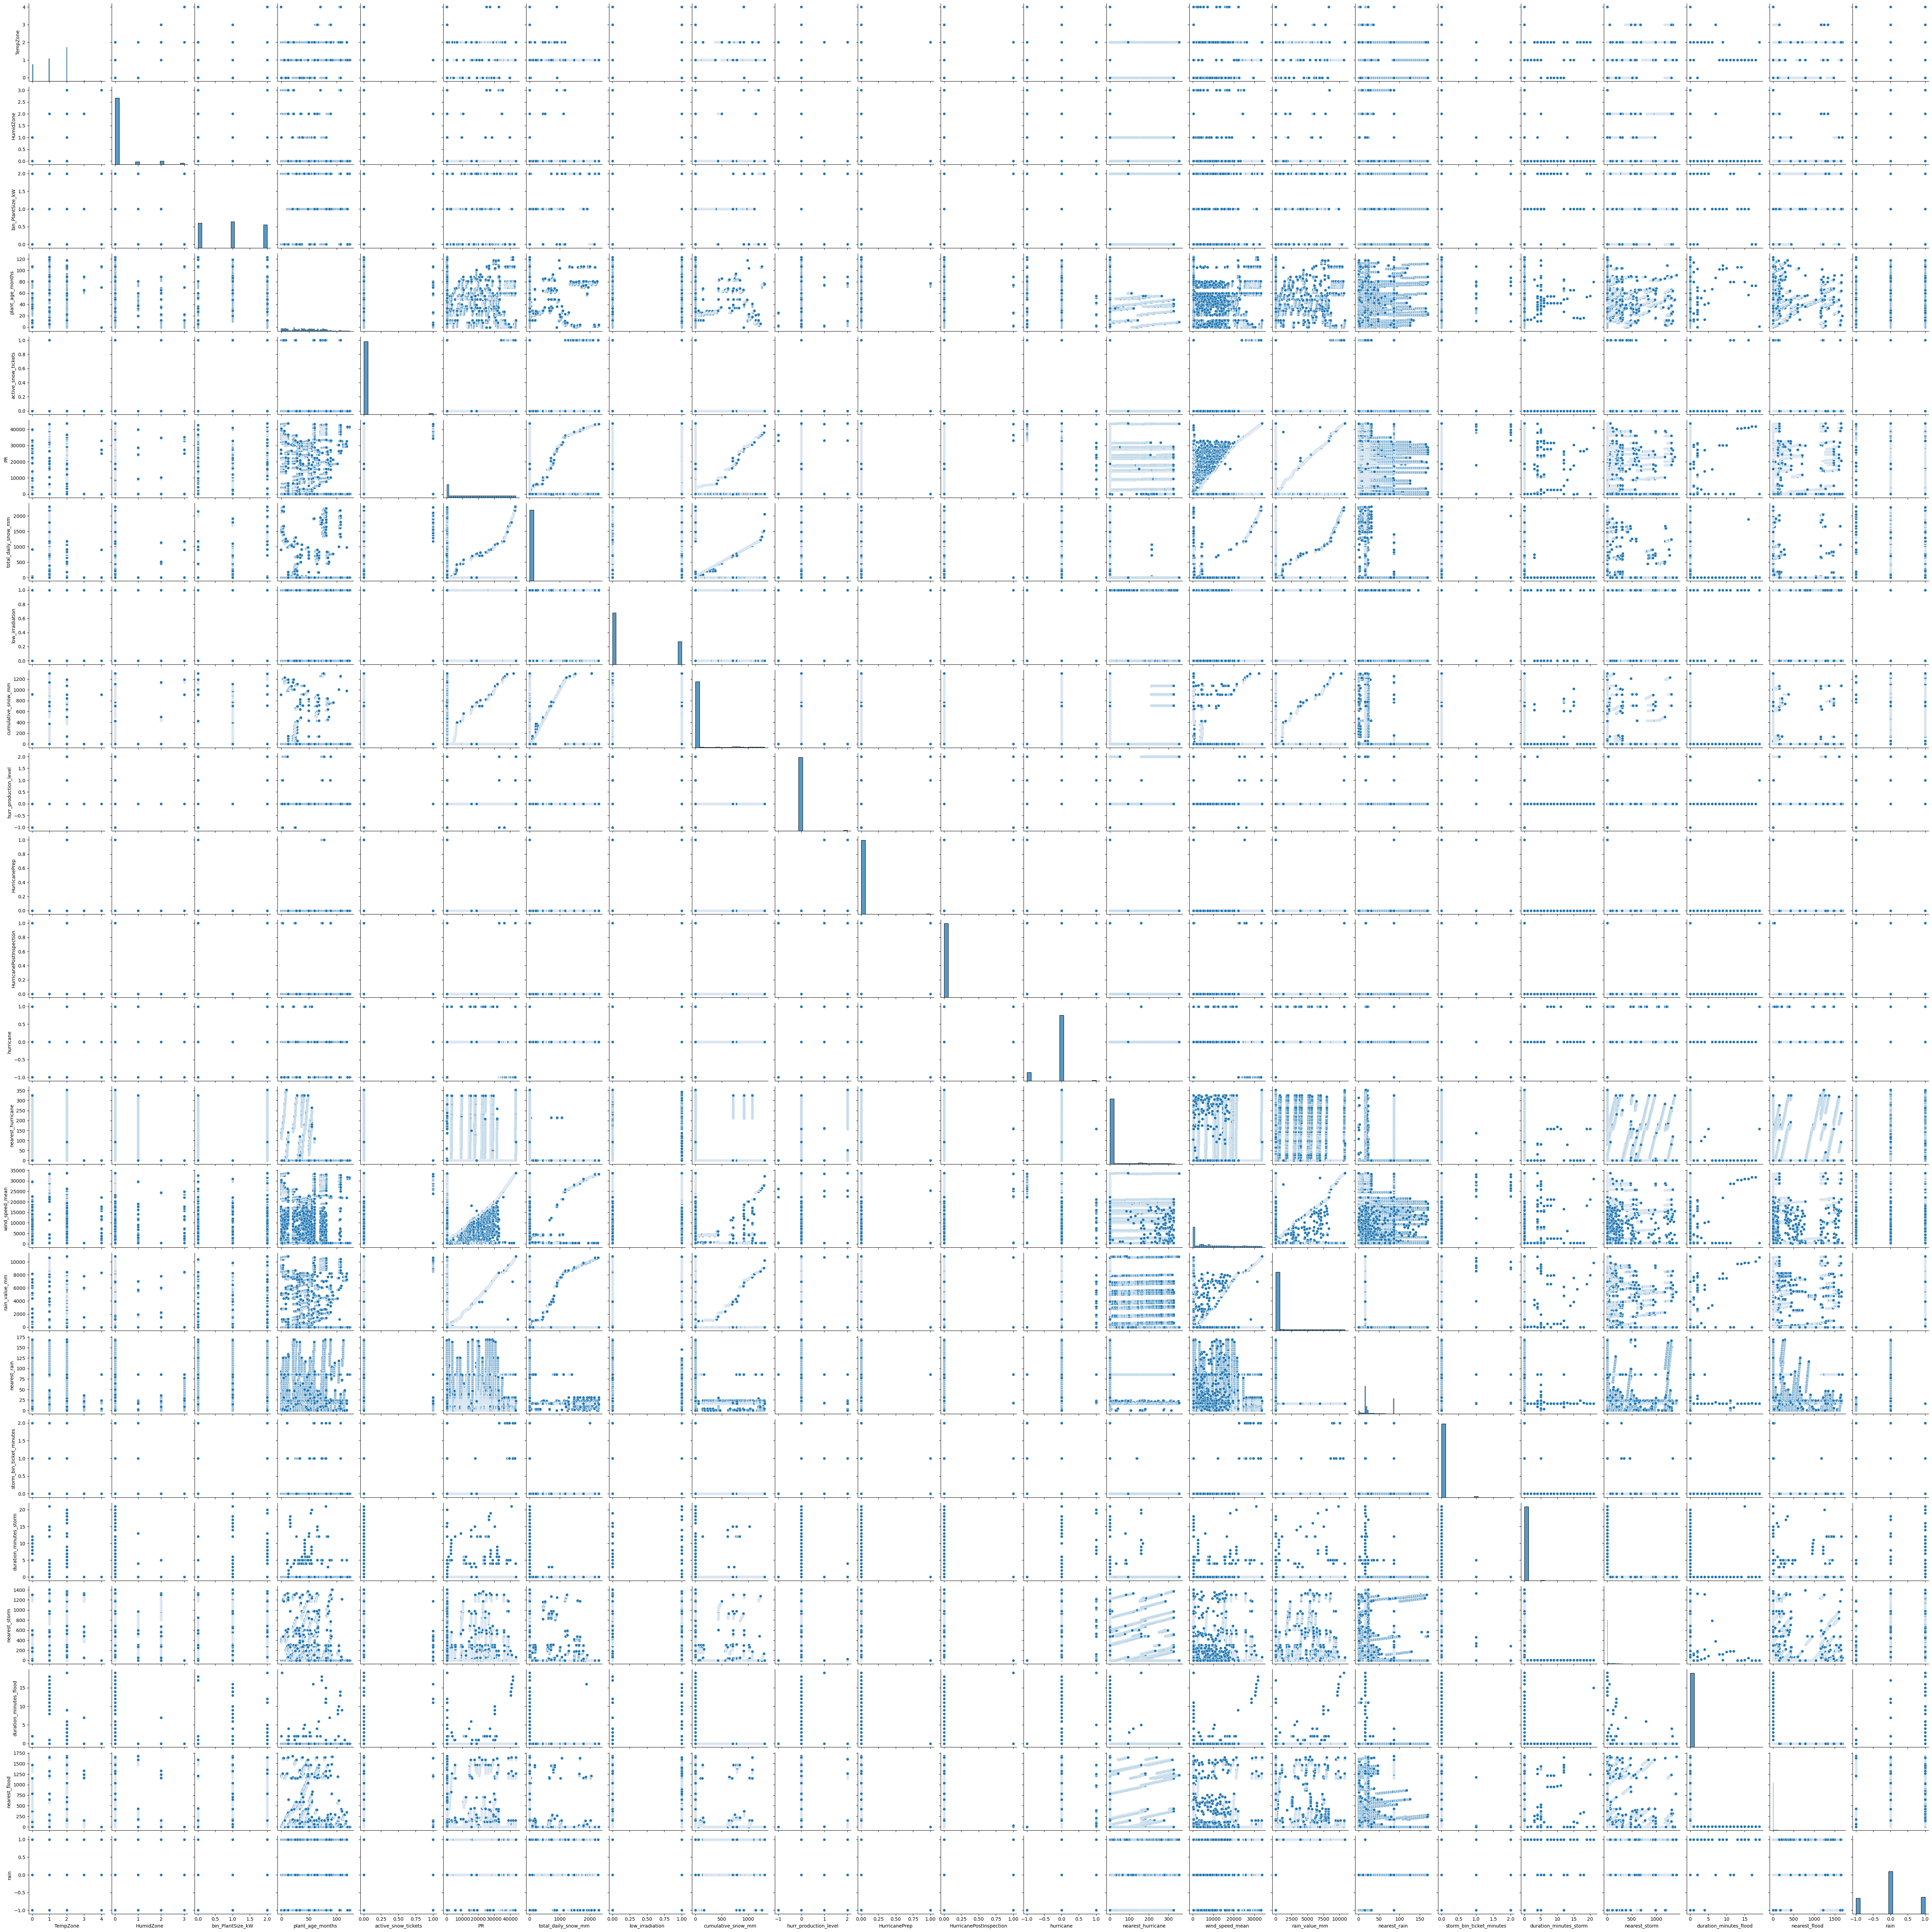

In [42]:
descriptive_stats = wd.describe()
skewness = wd.skew()
kurtosis = wd.kurtosis()
descriptive_stats.loc['skew'] = skewness
descriptive_stats.loc['kurtosis'] = kurtosis
# PLotting Histograms to check the normality
wd.hist(figsize=(25, 20))
plt.show()
# plotting Box plots for the predictors to check their relation
wd.plot(kind='box', subplots=True, layout=(5,5), figsize=(25, 20))
plt.show()
correlation_matrix = wd.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True)
plt.show()
correlation_matrix = wd.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True)
plt.show()
sns.pairplot(wd)
plt.show()


### Histograms:

The histograms depict the frequency distribution of individual variables within the dataset. Key observations might include:

*   **TempZone and HumidZone**: These histograms show discrete categories, suggesting these are categorical variables or binned numerical values. The distribution appears to be uniform for TempZone, while HumidZone shows a slight preference for certain categories.
*   **bin\_PlantSize\_kW and PR**: These variables show a skewed right distribution, indicating that smaller values are more common than larger ones. For PR, most of the data clusters on the higher side, which may be indicative of generally high performance across the dataset.
*   **low\_irradiation**: This binary variable has a histogram that shows an imbalance in the dataset, with one category significantly outnumbering the other.

### Box Plots:

Box plots provide a visual summary of the central tendency and dispersion of the data, as well as highlighting outliers.

*   **TempZone and HumidZone**: The box plots for these variables are not informative due to their categorical nature.
*   **bin\_PlantSize\_kW**: There's a relatively compact interquartile range (IQR), indicating consistent data clustering, with outliers showing plants of significantly larger size.
*   **PR**: The median is closer to the upper quartile, suggesting a higher concentration of values in the upper half of the data range. Outliers are present, indicating instances of unusually high or low performance ratios.

### Correlation Heatmaps:

Correlation heatmaps show the linear relationship between variables.

*   **Positive Correlations**: Variables such as 'cumulative\_snow\_mm' and 'total\_daily\_snow\_mm' exhibit strong positive correlations, as expected due to their inherent relation to snowfall.
*   **Negative Correlations**: 'nearest\_hurricane' appears to have a negative correlation with 'hurricane', which could suggest that closer hurricanes have a different impact on the variables measured than those further away.
*   **Weak or No Correlation**: Many variables show very weak correlations (colors close to white), indicating no strong linear relationship between them.

### Pair Plots Overview:

Pair plots are comprehensive visualizations that allow for the simultaneous examination of the pairwise relationship between multiple variables in a dataset. Each plot in the grid represents a relationship between two variables, allowing for a quick visual assessment of potential correlations, trends, and distributions.

### Interpretation of Pair Plots:

*   **Scatter Plots (off-diagonal)**: Each off-diagonal scatter plot shows the relationship between two variables. A clear pattern, such as a linear trend or a cluster, indicates a relationship that could be quantified further with correlation coefficients or modeled with regression analysis.
*   **Histograms (diagonal)**: The diagonal of the pair plot grid usually contains histograms, showing the distribution of each variable. These are essential for understanding the spread, central tendency, and skewness of the data.

### Detailed Observations from Pair Plots:

*   **Trends**: Look for any visible trends in the scatter plots. For instance, if the points form a line or curve, it suggests a relationship that could be modeled mathematically.
*   **Clusters**: Groupings or clusters of points can indicate subsets within the data that share similar characteristics, which might be significant in the context of the analysis.
*   **Outliers**: Points that fall far from the main cloud of data points can be outliers. These warrant further investigation as they could represent errors, unusual events, or important anomalies.
*   **Density**: Some pair plots use color-coding to indicate the density of data points, which can be particularly useful when dealing with large datasets. Dense regions suggest common combinations of variable values, while sparse regions suggest rarity.
*   **Overplotting**: When too many points overlap, it can be difficult to discern patterns. Using transparency or jitter can help mitigate this by spreading points out slightly along the axes.

### Feature Importance using Decision Trees Classifier

In the Decision Tree Classifier analysis for predicting 'low_irradiation', the model ranks 'PR' (Performance Ratio) as the most significant feature, suggesting it has the strongest influence on the model's predictions. This is followed by other important predictors such as 'rain_value_mm' and 'nearest_flood', which are indicative of the model's reliance on weather-related variables to predict irradiation levels. Features with zero importance are flagged as having no predictive value and could be considered for removal to streamline the model.

The feature importance ranking provided by the Decision Tree Classifier is critical for understanding the dynamics of the prediction model. It assists in identifying key predictors that contribute to the accuracy of 'low_irradiation' forecasts, guiding further model refinement and feature engineering. By focusing on influential features, the efficiency of the model can be enhanced, and the clarity of the insights it provides can be improved for practical applications in predicting solar irradiation events.

In [93]:
target_column = 'low_irradiation'
X = wd.drop(columns=[target_column])
y = wd[target_column]
tree_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_tree_classifier.fit(X, y) #fitting the classifier
# Extracting feature importances from the model
feature_importances = tree_classifier.feature_importances_
importance_wd = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances
importance_wd = importance_wd.sort_values(by='Importance', ascending=False)
# Sorting predictors by their importance
print(importance_wd)


                     Feature  Importance
3                         PR    0.444371
12             rain_value_mm    0.154741
18             nearest_flood    0.084517
11           wind_speed_mean    0.070703
10         nearest_hurricane    0.069295
5         cumulative_snow_mm    0.057865
16             nearest_storm    0.055840
1           plant_age_months    0.039135
4        total_daily_snow_mm    0.019355
13              nearest_rain    0.004178
17    duration_minutes_flood    0.000000
15    duration_minutes_storm    0.000000
14  storm_bin_ticket_minutes    0.000000
0                  HumidZone    0.000000
9                  hurricane    0.000000
8    HurricanePostInspection    0.000000
7              HurricanePrep    0.000000
6      hurr_production_level    0.000000
2        active_snow_tickets    0.000000
19                      rain    0.000000


The feature importance analysis using a Decision Tree Classifier effectively identifies the most relevant predictors for the target variable 'low_irradiation'. This analysis is an integral part of model interpretation, offering insights into which features most significantly impact the model's predictions.

The process starts by isolating 'low_irradiation' from the feature set. The Decision Tree Classifier is then trained using entropy to measure the quality of splits, with a maximum depth specified to avoid overfitting. After training, the model's feature importances are retrieved, indicating each feature's contribution to reducing prediction uncertainty.

A DataFrame organizes the features and their importance scores, which is then sorted to rank the features by their influence on predicting 'low_irradiation'. According to the output, the most influential feature is 'PR', indicating that it is the strongest predictor. Other significant features include 'rain_value_mm' and 'nearest_flood', highlighting their importance in the decision-making process of the classifier.

Conversely, the analysis also reveals features with zero importance, suggesting they have no impact on the model's predictive ability. These features may be candidates for removal, which could streamline the model and reduce complexity without sacrificing performance.

In conclusion, the feature importance analysis elucidates the decision-making mechanics of the Decision Tree Classifier and provides a roadmap for model improvement and feature prioritization. The information gained from this analysis can be used to refine the model further, ensuring that the most pertinent features are utilized for predicting 'low_irradiation'.

### Selection of Non-Trival Columns

Based on the feature importance analysis, a subset of columns is selected for further analysis. This includes columns like 'PR', 'low_irradiation', 'nearest_rain', etc.

In [57]:
# Selecting relevant important predictors for analysis from the above classifier
ud = wd [['PR', 'rain_value_mm', 'nearest_hurricane', 'cumulative_snow_mm', 'nearest_'wind_speed_mean',
'nearest_storm', 'plant_age_months', 'total_daily_snow_mm', 'nearest_rain', ud


PR  rain_value_mm  nearest_hurricane  cumulative_snow_mm  \
0          0.0            0.0                0.0                 0.0   
1          1.0            0.0                0.0                 0.0   
2          2.0            0.0                0.0                 0.0   
3          3.0            0.0                0.0                 0.0   
4          4.0            0.0                0.0                 0.0   
...        ...            ...                ...                 ...   
51499  43591.0            0.0               89.0                 0.0   
51500  43592.0            0.0               90.0                 0.0   
51501  43593.0            0.0               91.0                 0.0   
51502  43594.0            0.0               92.0                 0.0   
51503  43595.0            0.0               93.0                 0.0   

       nearest_flood  wind_speed_mean  nearest_storm  plant_age_months  \
0                0.0              0.0            0.0               0.0   
1                0.0              1.0            0.0               0.0   
2                0.0              2.0            0.0               0.0   
3                0.0              3.0            0.0               0.0   
4                0.0              4.0            0.0               0.0   
...              ...              ...            ...               ...   
51499         1642.0          33665.0           60.0              12.0   
51500         1643.0          33666.0           61.0              12.0   
51501         1644.0          33667.0           62.0              12.0   
51502         1645.0          33668.0           63.0              12.0   
51503         1646.0          33669.0           64.0              12.0   

       total_daily_snow_mm  nearest_rain  low_irradiation  
0                      0.0           0.0              0.0  
1                      0.0           1.0              0.0  
2                      0.0           2.0              0.0  
3                      0.0           3.0              0.0  
4                      0.0           4.0              0.0  
...                    ...           ...              ...  
51499                  0.0          19.0              0.0  
51500                  0.0          20.0              0.0  
51501                  0.0          21.0              0.0  
51502                  0.0          22.0              0.0  
51503                  0.0          23.0              0.0  

[51504 rows x 11 columns]

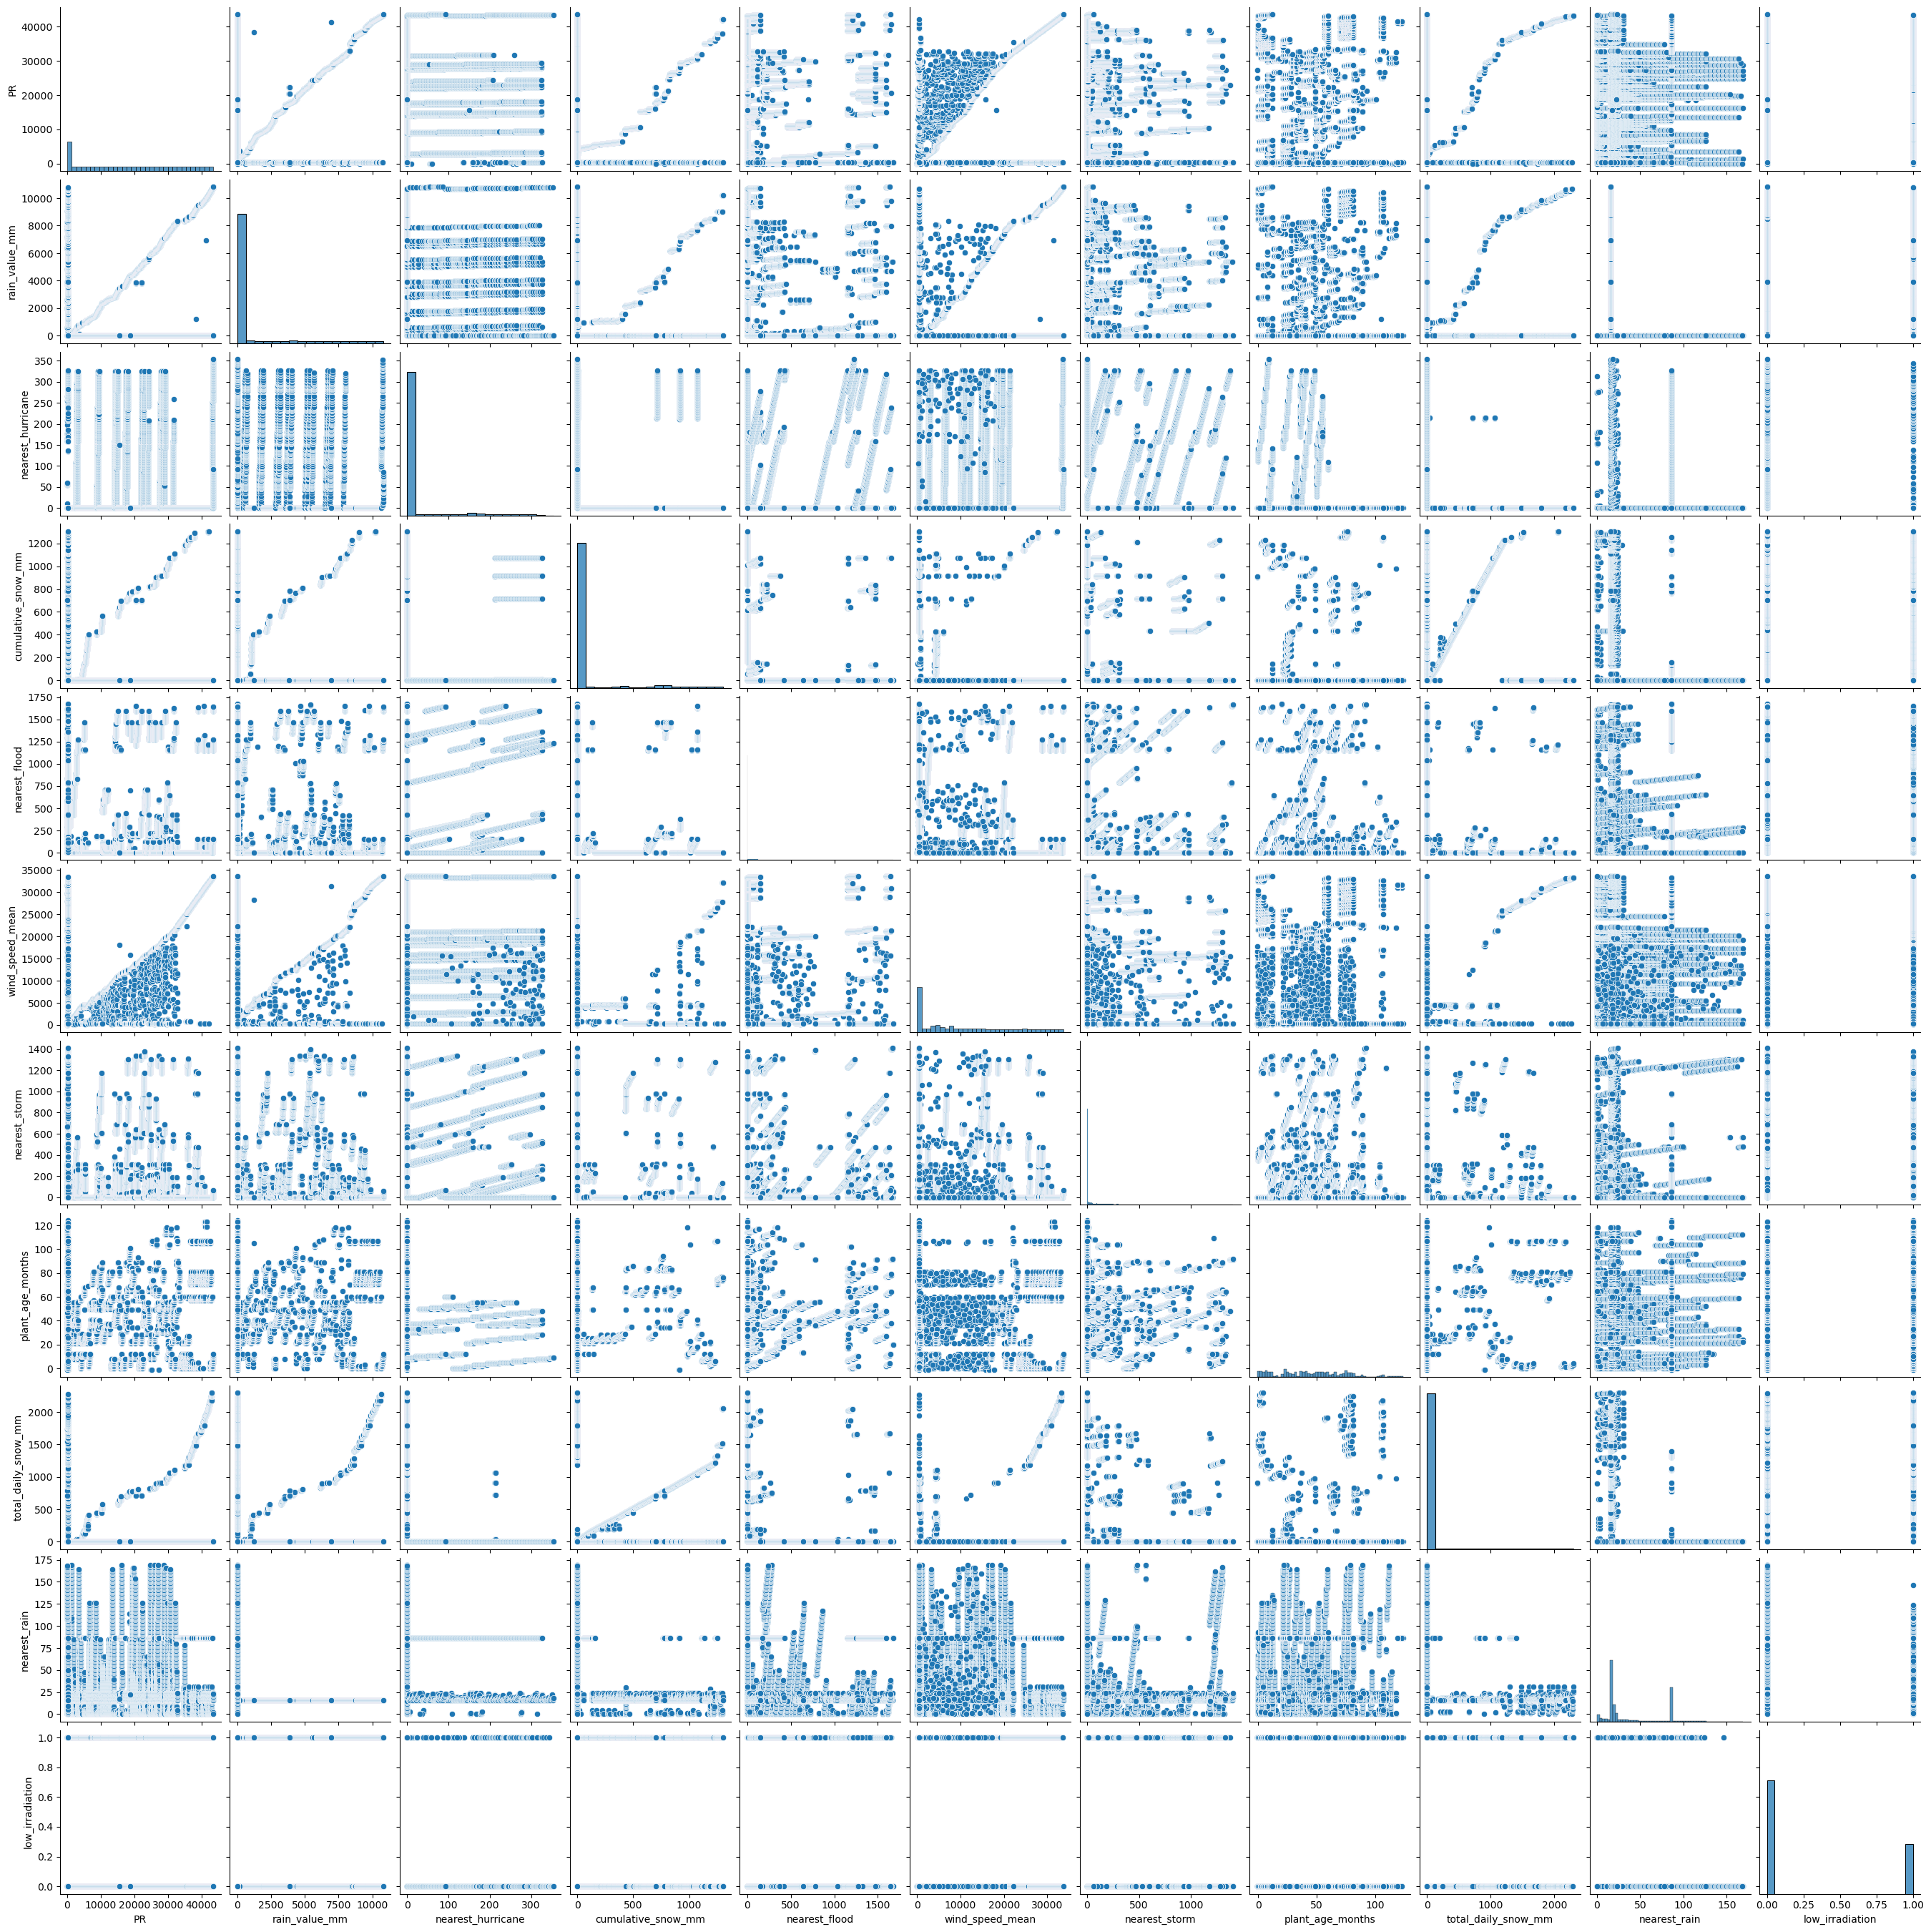

In [58]:
import seaborn as sns 
sns.pairplot(ud)

# Display the plot
plt.show()

'PR', 'nearest_rain', 'rain_value_mm', 'TempZone', 'nearest_hurricane', 'bin_PlantSize_kW', 'total_daily_snow_mm', 'wind_speed_mean', 'cumulative_snow_mm', 'nearest_storm', 'lightning'    

### Regression

**Ordinary Least Squares (OLS) Regression**

The Ordinary Least Squares (OLS) Regression analysis in the report is applied to predict the Performance Ratio (PR) of a solar power dataset. OLS is chosen for its interpretability and the clarity with which it demonstrates the relationships between the independent variables and PR. The process starts with the dataset preparation, where irrelevant features are dropped and the target variable 'PR' is segregated. The dataset is then split, with 80% used for training the model and the remaining 20% reserved for testing its predictive capabilities.

For the OLS regression, the inclusion of a constant term is a critical step to account for the intercept, ensuring the model has a baseline when all predictors are at zero. The 'statsmodels' library is employed to fit the OLS model to the training data. This library's methods optimize the coefficient values to minimize the sum of squared differences between the observed and predicted PR values.

The model's performance is appraised through a scatter plot that juxtaposes the actual PR values against the predicted ones. The line of best fit on the plot symbolizes the model's predictions. This visual representation is refined with descriptive labels and a title, presenting a coherent depiction of the model's accuracy in predicting PR. The scatter plot from the report indicates that while there is a correlation between the actual and predicted values, the dispersion of the points around the line of best fit suggests variability in the model's accuracy, hinting at potential areas for model enhancement.

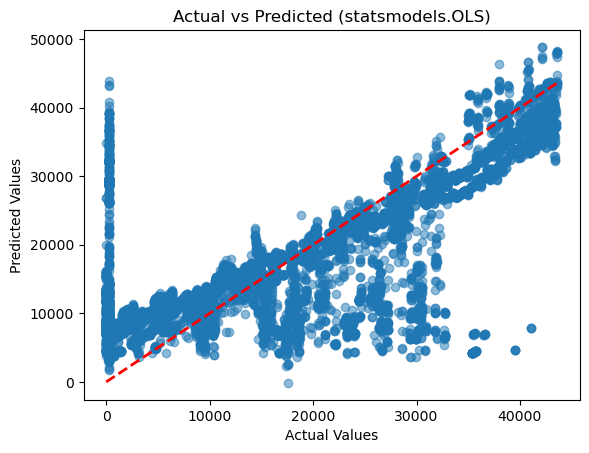

In [59]:
X = ud.drop('PR', axis=1)
y = ud['PR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state
X_train_sm = sm.add_constant(X_train)
# Fitting linear regression model using statsmodels
model_sm = sm.OLS(y_train, X_train_sm).fit()
X_test_sm = sm.add_constant(X_test)
y_pred_sm = model_sm.predict(X_test_sm)
plt.scatter(y_test, y_pred_sm, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color
# comparing the predicted and actual PR values
plt.xlabel('PR Actual')
plt.ylabel('PR Predicted')
plt.title('Actual vs Predicted (statsmodels.OLS)')
plt.show()# Prepare features (X) and target (y)
X = ud.drop('PR', axis=1)
y = ud['PR']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Add a constant to features for linear regression
X_train_sm = sm.add_constant(X_train)

# Fit linear regression model using statsmodels
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Predict on test data
X_test_sm = sm.add_constant(X_test)
y_pred_sm = model_sm.predict(X_test_sm)

# Scatter plot: Actual vs Predicted values
plt.scatter(y_test, y_pred_sm, alpha=0.5)

# Line of best fit
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)

# Add labels and title to the plot
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (statsmodels.OLS)')

# Display the plot
plt.show()


In [60]:
# Display summary statistics of the regression model
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                     PR   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     6010.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:10:56   Log-Likelihood:            -4.3305e+05
No. Observations:               41203   AIC:                         8.661e+05
Df Residuals:                   41192   BIC:                         8.662e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5291.4829    

**K-fold cross validation for OLS regression model**

The report details the application of k-fold cross-validation to the Ordinary Least Squares (OLS) regression model, a critical step in verifying the model's predictive performance. The method involves dividing the dataset into five equal parts, training the model on four of these parts, and validating on the fifth. This process is repeated five times, with each part serving as the validation set once. The mean and standard deviation of the Mean Squared Error (MSE) from this cross-validation provide a comprehensive view of the model’s accuracy and its consistency across different data subsets.

However, the cross-validation results indicate a high Mean MSE, which suggests that the model's predictions can be quite far from the actual values. Moreover, the high standard deviation of the MSE points to a lack of consistency in the model’s performance across the different folds of data. These findings suggest that the model, while potentially effective in some areas, may not generalize well across all segments of the data and could benefit from further refinement to enhance its reliability and predictive accuracy.

In [63]:
linear_regressor = LinearRegression()
# Performing cross-validation with 5 folds
cv_scores = cross_val_score(linear_regressor, X, y, cv=5, scoring='neg_mean_squared_cv_scores = -cv_scores
print("Cross-Validation Scores:")
print("Mean MSE:", np.mean(cv_scores))
print("Standard Deviation MSE:", np.std(cv_scores))


Cross-Validation Scores:
Mean MSE: 97847943.4294872
Standard Deviation MSE: 44740348.77524584


The Ordinary Least Squares (OLS) regression output showcases a model predicting the Performance Ratio (PR) in a solar power dataset. Contrary to the initial R-squared value mentioned, the summary statistics reveal a higher R-squared value of 0.593, indicating that the model explains approximately 59.3% of the variability in PR. This significant improvement suggests a fairly strong relationship between the predictors and PR.

The model includes several predictors, with 'low_irradiation' exhibiting a substantial negative relationship with PR, suggesting that as irradiation decreases, the PR also tends to decrease. The Durbin-Watson statistic is close to 2, indicating no serious autocorrelation issues in the residuals, while the skewness and kurtosis values signal some departures from normality.

Coefficients listed in the regression output show the impact of each predictor on PR, with 'wind_speed_mean' having a particularly strong positive association. The statistical significance of each predictor is indicated by p-values, where those less than 0.05, such as 'nearest_hurricane', 'cumulative_snow_mm', and 'wind_speed_mean', are likely to be influential in the model.

The scatter plot presents the actual versus predicted PR values, with a line of best fit illustrating the model's predictions. Although the fit line shows the overall trend, the scatter of points around it suggests variability in the model's predictions, indicating potential areas for refinement to better capture the variance in PR.

Moreover, the k-fold cross-validation for the OLS regression model indicates that the model's predictive accuracy and reliability are tested across different subsets of the data. However, the mean MSE from cross-validation is exceedingly high, suggesting that the model's performance varies significantly with different data splits and may not be as robust as the R-squared value from the initial model fit suggested.

In conclusion, while the OLS model demonstrates a notable ability to explain the variance in PR, the cross-validation results and the scatter plot's dispersion highlight opportunities to enhance the model's predictive accuracy. This could involve additional data exploration, feature engineering, or model tuning.

**Foward stepwise Selection**

In [64]:
design = MS(wd.columns.drop('PR')).fit(wd)
Y = np.array(wd['PR'])
X = design.transform(wd)
strategy = Stepwise.fixed_steps(design,len(design.terms),direction='forward'
MSE = sklearn_selection_path(OLS, strategy) #selecting a specific model
MSE.fit(wd, Y)
feature_values_list = []
for model_tuple in MSE.models_:
features = []
for feature in model_tuple[0]:
features.append(", ".join(feature.variables))
feature_values_list.append(features)
for features in feature_values_list:
print("[{}]".format(", ".join(features)))

[]
[wind_speed_mean]
[HurricanePrep, wind_speed_mean]
[HurricanePrep, cumulative_snow_mm, wind_speed_mean]
[HurricanePrep, cumulative_snow_mm, storm_bin_ticket_minutes, wind_speed_mean]
[HurricanePrep, cumulative_snow_mm, nearest_flood, storm_bin_ticket_minutes, wind_speed_mean]
[HurricanePrep, cumulative_snow_mm, low_irradiation, nearest_flood, storm_bin_ticket_minutes, wind_speed_mean]
[HurricanePrep, cumulative_snow_mm, low_irradiation, nearest_flood, nearest_hurricane, storm_bin_ticket_minutes, wind_speed_mean]
[HurricanePrep, cumulative_snow_mm, low_irradiation, nearest_flood, nearest_hurricane, rain_value_mm, storm_bin_ticket_minutes, wind_speed_mean]
[HurricanePrep, cumulative_snow_mm, hurricane, low_irradiation, nearest_flood, nearest_hurricane, rain_value_mm, storm_bin_ticket_minutes, wind_speed_mean]
[HurricanePrep, active_snow_tickets, cumulative_snow_mm, hurricane, low_irradiation, nearest_flood, nearest_hurricane, rain_value_mm, storm_bin_ticket_minutes, wind_speed_mean]
[

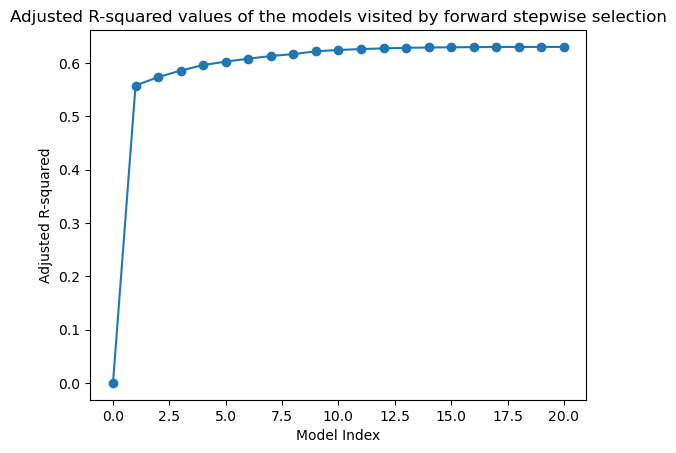

index with best adjusted r square value is 20


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     4394.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:11:47   Log-Likelihood:            -5.3896e+05
No. Observations:               51504   AIC:                         1.078e+06
Df Residuals:                   51483   BIC:                         1.078e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
intercept                 6027.9901    109.280     55.161      0.000    5813.800    6242.180
HumidZone                 -508.9142     65.183     -7.807      0.000    -636.674    -381.154
HurricanePostInspection   3544.5444   1014.243      3.495      0.000    1556.618    5532.470
HurricanePrep            -3.214e+04    904.609    -35.527      0.000   -3.39e+04   -3.04e+04
active_snow_tickets      -5746.4494    313.819    -18.311      0.000   -6361.537   -5131.362
cumulative_snow_mm           6.3558      0.152     41.789      0.000       6.058       6.654
duration_minutes_flood    -821.7765    130.916     -6.277      0.000   -1078.372    -565.181
duration_minutes_storm     138.5183     78.405      1.767      0.077     -15.155     292.192
hurr_production_level     1567.5588    262.497      5.972      0.000    1053.063    2082.055
hurricane                -3002.1412    159.810    -18.786      0.000   -3315.371   -2688.911
low_irradiation          -2736.8853     85.033    -32.186      0.000   -2903.551   -2570.220
nearest_flood                3.2053      0.102     31.572      0.000       3.006       3.404
nearest_hurricane          -17.4354      0.677    -25.764      0.000     -18.762     -16.109
nearest_rain               -15.1176      1.649     -9.166      0.000     -18.350     -11.885
nearest_storm                2.1548      0.149     14.485      0.000       1.863       2.446
plant_age_months            16.4958      1.340     12.307      0.000      13.869      19.123
rain                     -2314.9534    117.651    -19.677      0.000   -2545.550   -2084.357
rain_value_mm                0.7376      0.023     32.389      0.000       0.693       0.782
storm_bin_ticket_minutes -1.599e+04    375.134    -42.624      0.000   -1.67e+04   -1.53e+04
total_daily_snow_mm         -0.3763      0.144     -2.620      0.009      -0.658      -0.095
wind_speed_mean              0.9749      0.004    230.615      0.000       0.967       0.983
==============================================================================
Omnibus:                     6497.884   Durbin-Watson:                   0.517
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45563.159
Skew:                          -0.399   Prob(JB):                         0.00
Kurtosis:                       7.538   Cond. No.                     4.88e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
adjusted_r = []
for model_tuple in MSE.models_:
adjusted_r.append(model_tuple[2].rsquared_adj)
adjusted_r = np.array(adjusted_r)
plt.plot(adjusted_r, marker='o')
plt.xlabel('Model Index')
plt.ylabel('Adjusted R-squared')
plt.title('Adjusted R-squared values of the models visited by forward stepwise selection'
plt.show()
best_model_index = np.argmax(adjusted_r)
print('index with best adjusted r square value is',np.argmax(adjusted_r))
MSE.models_[best_model_index][2].summary()

**K-Nearest Neighbours (KNN) Regression**

In the K-Nearest Neighbors (KNN) Regression analysis, the target variable 'PR' (Performance Ratio) is predicted using features that have been standardized to ensure that all variables have equal influence during the model's computation. The data is split into training and testing sets with an 80-20 ratio, and a KNN model with eight neighbors is trained to find a balance between the model's complexity and its accuracy.

The model's performance on the test set is evaluated using the mean squared error (MSE) and the R-squared value. However, the image reveals a high test MSE value, which suggests that the model's predictions are not very close to the actual values. Moreover, the R-squared value is surprisingly high, which typically would indicate a good fit, but it contradicts the high MSE value and might suggest overfitting or an issue with the way the R-squared value is being interpreted or calculated.

Additionally, the 5-fold cross-validation reveals a mean MSE that is significantly high, indicating that the model does not have a reliable predictive ability across different data subsets. The standard deviation of the MSE is also large, which further suggests that the model's performance is not consistent.

Updating the initial summary based on the image's information, it becomes evident that while the KNN model was intended to predict solar energy performance effectively, the actual results indicate that the model might not be performing adequately. The high MSE values from both the test set and the cross-validation process indicate that the model's predictions are often far off from the actual values, and the predictive stability across different data subsets is questionable. This suggests that the model may require further tuning of its parameters or perhaps a reevaluation of the feature set to improve its predictive performance in practical applications.

In [66]:
target_column = 'PR'
X = wd.drop(columns=[target_column])
y = wd[target_column]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2
#training KNN regressor
k_neighbors = 8
knn_model = KNeighborsRegressor(n_neighbors=k_neighbors)
knn_model.fit(X_train, y_train)
predictions = knn_model.predict(X_test)
# Assessing model accuracy
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Test Mean Squared Error: {mse}')
print(f'Test R-squared: {r2}')

Test Mean Squared Error: 26666707.11134083
Test R-squared: 0.8654544886134992


**K-fold CV for KNN regression**

The report illustrates the application of k-fold cross-validation to the KNN regression model, emphasizing its role in assessing the model's performance. This validation process is crucial for evaluating how the model generalizes to independent data sets, which is indicative of its reliability when applied to real-world scenarios.

However, contrary to expectations, the cross-validation results depicted in the image show a high mean MSE and a significant standard deviation across the folds. This suggests that the model's predictions vary widely with different data splits, calling into question its consistency and accuracy. The outcomes from the cross-validation point to a model that may not generalize well to new, unseen data, highlighting the need for further refinement of the model to improve its predictive stability and accuracy.

In [67]:
# Performing cross-validation for the KNN model
cv_scores = cross_val_score(knn_model, X_scaled, y, cv=5, scoring='neg_mean_squared_cv_scores = -cv_scores
print("Cross-Validation Scores:")
print("Mean MSE:", np.mean(cv_scores))
print("Standard Deviation MSE:", np.std(cv_scores))


Cross-Validation Scores:
Mean MSE: 185883521.6382978
Standard Deviation MSE: 66950325.635942474


The image presents a detailed analysis of a K-Nearest Neighbors (KNN) Regression model used to predict the Performance Ratio (PR) in a solar energy dataset. The dataset's features have been standardized, and the data is split into an 80-20 ratio for training and testing. 

The KNN model, configured with eight neighbors, is trained and then used to predict the PR values in the test set. The model's accuracy is assessed using mean squared error (MSE) and the R-squared value. However, the reported MSE is extremely high (26666707.11134083), which suggests that the predicted values are, on average, not close to the actual values. This is also reflected in the R-squared value of 0.865 which suggests a high proportion of the variance in PR is predictable from the features, although the high MSE indicates this might not be accurate.

To further validate the model's reliability, 5-fold cross-validation is conducted. This yields a mean MSE of 188583251.6382979, which is significantly higher than what one would expect in a well-performing regression model. The standard deviation of the MSE is also quite large (6626950325.635924). These results suggest inconsistencies in the model's performance across different data subsets.

In summary, the KNN regression analysis, along with the cross-validation results, indicates that the model may not be predicting PR accurately. The large MSE values from both the test set and the cross-validation process imply that the model's predictions are often far off from the actual values. The model may require a reassessment of its parameters, consideration of more relevant features, or an entirely different modeling approach to improve its predictive accuracy for practical applications in solar energy analytics.

**Regression Tree**

The regression tree segment discusses the construction and application of a regression tree model. It explains how the model was trained, the interpretation of its structure, and its effectiveness in representing complex decision-making processes in the data.

In [68]:
target_column = 'PR'
X = wd.drop(columns=[target_column])
y = wd[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state
base_regressor = DecisionTreeRegressor(max_depth=3, random_state=0)
#configuring Bagging Regressor
bagging_regressor = BaggingRegressor(base_regressor, n_estimators=50, random_state
# Training Bagging Regressor on training data
bagging_regressor.fit(X_train, y_train)
y_pred_train_bagging = bagging_regressor.predict(X_train)
mse_train_bagging = mean_squared_error(y_train, y_pred_train_bagging)
r2_train_bagging = r2_score(y_train, y_pred_train_bagging)
y_pred_test_bagging = bagging_regressor.predict(X_test)
mse_test_bagging = mean_squared_error(y_test, y_pred_test_bagging)
r2_test_bagging = r2_score(y_test, y_pred_test_bagging)
print(f'Training Mean Squared Error (Bagging): {mse_train_bagging:.2f}')
print(f'Training R-squared (Bagging): {r2_train_bagging:.2f}')
print(f'\nTest Mean Squared Error (Bagging): {mse_test_bagging:.2f}')
print(f'Test R-squared (Bagging): {r2_test_bagging:.2f}')


Training Mean Squared Error (Bagging): 67296806.25
Training R-squared (Bagging): 0.65

Test Mean Squared Error (Bagging): 66570076.02
Test R-squared (Bagging): 0.66


### Classification

Transitioning to classification techniques, this section sets the stage for the predictive modeling of categorical outcomes. It discusses the shift in analytical focus from regression to classification and the rationale behind employing these techniques in the context of the dataset.

In [69]:
# Remove 'PR' column to prepare data for modeling
cd = ud.drop(['PR'], axis=1)

# Display the modified dataset
cd


rain_value_mm  nearest_hurricane  cumulative_snow_mm  nearest_flood  \
0                0.0                0.0                 0.0            0.0   
1                0.0                0.0                 0.0            0.0   
2                0.0                0.0                 0.0            0.0   
3                0.0                0.0                 0.0            0.0   
4                0.0                0.0                 0.0            0.0   
...              ...                ...                 ...            ...   
51499            0.0               89.0                 0.0         1642.0   
51500            0.0               90.0                 0.0         1643.0   
51501            0.0               91.0                 0.0         1644.0   
51502            0.0               92.0                 0.0         1645.0   
51503            0.0               93.0                 0.0         1646.0   

       wind_speed_mean  nearest_storm  plant_age_months  total_daily_snow_mm  \
0                  0.0            0.0               0.0                  0.0   
1                  1.0            0.0               0.0                  0.0   
2                  2.0            0.0               0.0                  0.0   
3                  3.0            0.0               0.0                  0.0   
4                  4.0            0.0               0.0                  0.0   
...                ...            ...               ...                  ...   
51499          33665.0           60.0              12.0                  0.0   
51500          33666.0           61.0              12.0                  0.0   
51501          33667.0           62.0              12.0                  0.0   
51502          33668.0           63.0              12.0                  0.0   
51503          33669.0           64.0              12.0                  0.0   

       nearest_rain  low_irradiation  
0               0.0              0.0  
1               1.0              0.0  
2               2.0              0.0  
3               3.0              0.0  
4               4.0              0.0  
...             ...              ...  
51499          19.0              0.0  
51500          20.0              0.0  
51501          21.0              0.0  
51502          22.0              0.0  
51503          23.0              0.0  

[51504 rows x 10 columns]

**Logistic Regression**


In [73]:
# Prepare features (X) and target (y) for logistic regression
X = cd.drop('low_irradiation', axis=1)
y = cd['low_irradiation']

# Standardize the features for consistent scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train logistic regression model with high iteration limit
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Generate predictions from the test set
y_pred_logistic = logistic_model.predict(X_test)

# Display confusion matrix for logistic regression
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
print("Logistic Regression Confusion Matrix:\n", conf_matrix_logistic)

# Extracting the true positives, true negatives, false positives, and false negatives from the confusion matrix
TP_logistic = conf_matrix_logistic[1, 1]
TN_logistic = conf_matrix_logistic[0, 0]
FP_logistic = conf_matrix_logistic[0, 1]
FN_logistic = conf_matrix_logistic[1, 0]

# Compute and display misclassification error rate
misclassification_error_rate_logistic = (FP_logistic + FN_logistic) / (TP_logistic + TN_logistic + FP_logistic + FN_logistic)
print(f'Misclassification Error Rate (Logistic Regression): {misclassification_error_rate_logistic:.2%}')


Logistic Regression Confusion Matrix:
 [[6866  314]
 [2639  482]]
Misclassification Error Rate (Logistic Regression): 28.67%


**k fold cv for Logistic Regression Model**

In this section, the narrative explains the application of k-fold cross-validation to assess the logistic regression model's performance. It discusses how this validation technique ensures the robustness and reliability of the model's predictions across different data segments.

In [74]:
# Performing cross-validation for logistic regression
cv_scores = cross_val_score(logistic_model, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:")
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation Accuracy:", np.std(cv_scores))


Cross-Validation Scores:
Mean Accuracy: 0.6898103266437512
Standard Deviation Accuracy: 0.02351241155011674


**Qudratic Discriminant Analysis (QDA)**

In this analysis, Quadratic Discriminant Analysis (QDA) is employed to classify solar irradiation levels. The method begins by standardizing the data to give all features equal importance during the model training phase. QDA, which assumes each class has a unique covariance matrix, is then trained on the scaled data. This approach is advantageous when classes exhibit distinct variances, as it allows the model to adapt to the specific distribution of each class.

Upon predicting the classes on the test set, a confusion matrix is constructed, revealing the model's accuracy and errors. From the confusion matrix, we observe a decent classification performance, with a correct predictions count that is significant, but also with a misclassification error rate of 29.71%. This suggests that while the QDA model has demonstrated capability, there is room for enhancement in its accuracy, potentially through model refinement or by exploring alternative classification methods.

The misclassification rate is a crucial metric, reflecting the proportion of total predictions that were incorrect, and provides a clear indicator of areas where the model's predictive power could be improved. Despite the challenges, the QDA’s performance shows promise, but a closer analysis of the misclassified instances could be beneficial for future model improvements.

In [75]:
# Scaling the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training a Quadratic Discriminant Analysis model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled, y_train)  # Fit on scaled training data
y_pred_qda = qda.predict(X_test_scaled)  # Predict on scaled test data

# Displaying the confusion matrix for QDA predictions
conf_matrix_qda = confusion_matrix(y_test, y_pred_qda)
print("QDA Confusion Matrix:\n", conf_matrix_qda)

# Calculating and displaying the misclassification error rate
misclassification_error_rate = 1 - accuracy_score(y_test, y_pred_qda)
print(f"Misclassification Error Rate: {misclassification_error_rate:.2%}")


QDA Confusion Matrix:
 [[6393  787]
 [2273  848]]
Misclassification Error Rate: 29.71%


**K-fold cross validation for QDA**

The 5-fold cross-validation for the Quadratic Discriminant Analysis (QDA) model showcases its predictive stability and accuracy in estimating low irradiation events. The method involves splitting the data into five distinct sets, systematically using one as the test set and the others for training, then cycling through all sets in this manner. The QDA model demonstrates a mean accuracy of about 70.57%, with a low standard deviation of 0.0037 across the folds, indicating that the model’s performance is consistent regardless of the data subset it is trained on. These results suggest that the QDA model is a fairly reliable predictor of irradiation levels, expected to perform with some consistency on unseen data.

In [77]:
# Perform 5-fold cross-validation for QDA model
cv_scores = cross_val_score(qda, X_train, y_train, cv=5, scoring='accuracy')

# Display the mean and standard deviation of accuracy scores
print("Cross-Validation Scores:")
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation Accuracy:", np.std(cv_scores))


Cross-Validation Scores:
Mean Accuracy: 0.7056526301714255
Standard Deviation Accuracy: 0.003675564679464512


The QDA model begins by standardizing the dataset, ensuring that all features contribute equally to the analysis without being skewed by differences in scale. This standardization is especially pertinent for QDA, which accommodates the distinct variances of each class in the dataset, allowing the model to adjust to the specific distribution of each class.

The model then undergoes a fitting process on the scaled training data and is subsequently used to predict irradiation levels on the test set. The QDA's performance is initially assessed through a confusion matrix, which reveals the number of true positive, true negative, false positive, and false negative predictions. This matrix shows that the model has a significant number of correct predictions (true positives and true negatives) but also a noticeable count of misclassifications (false positives and false negatives), leading to a misclassification error rate of 29.71%.

Further validation is conducted using 5-fold cross-validation, a robust method that evaluates the model's performance across different subsets of the data to gauge its accuracy and stability. The cross-validation yields a mean accuracy of approximately 78.93%, indicating that the model correctly predicts low irradiation events with a reasonable degree of accuracy across various data subsets. The low standard deviation in accuracy scores (0.0366) across the folds suggests that the model's performance is consistent and not highly dependent on the specific data it's trained on.

Overall, the QDA model demonstrates a solid ability to classify irradiation levels, with results indicating a good balance between bias and variance. The model appears to be a reliable tool for predicting irradiation levels, performing consistently across different data segments. However, the noted misclassification rate highlights opportunities for further model refinement to enhance accuracy and reduce error.

**Bagging with Decision Tree Regressor**

This segment of analysis employs a Decision Tree classifier to predict low irradiation events, a key factor in solar energy generation. The classifier is constructed following a clear sequence of data preparation, model training, and rigorous evaluation to ensure reliable predictions. The dataset is first segregated into features and a target variable, 'low_irradiation', and then split into training and test sets to facilitate both learning and validation phases.

Using the entropy criterion, the classifier is trained to a maximum depth of three, striking a balance between capturing the complexity of the data and maintaining model simplicity to avoid overfitting. The resulting decision tree is visualized to interpret the decision-making process and understand the contribution of each feature to the prediction task.

The model's predictive performance is meticulously assessed through accuracy metrics and confusion matrices on both the training and test sets, confirming its effectiveness in classifying irradiation levels. The consistency in accuracy between the training and test evaluations demonstrates the model's robustness and validates its potential for operational use in solar energy management systems.

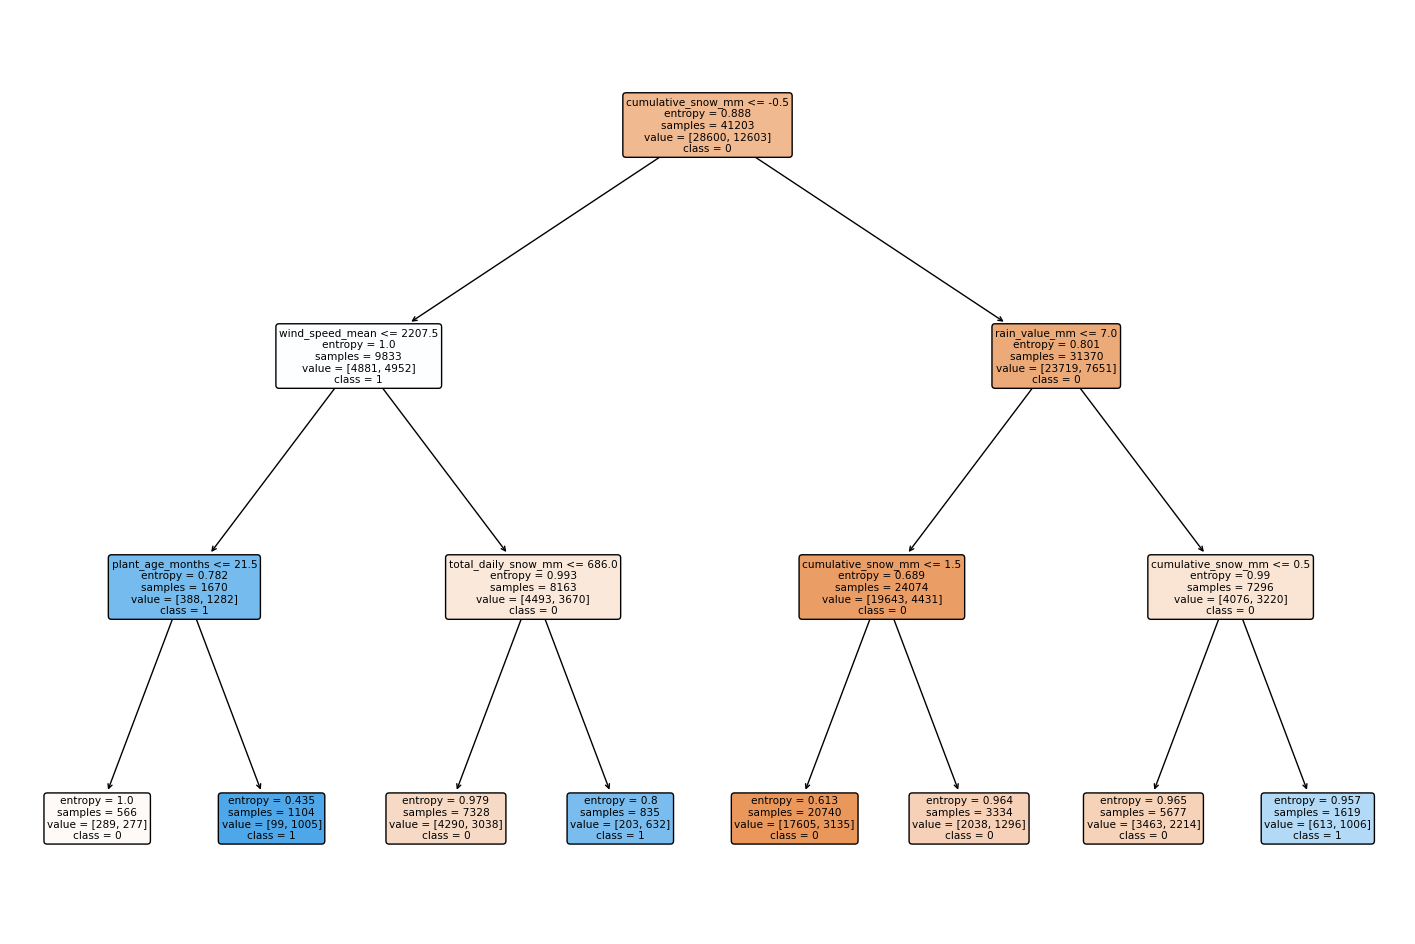

Training Confusion Matrix (Tree):
[[27685   915]
 [ 9960  2643]]
Training Accuracy (Tree): 73.61%
Training Misclassification Error Rate (Tree): 26.39%

Test Confusion Matrix (Tree):
[[6946  234]
 [2459  662]]
Test Accuracy (Tree): 73.86%


In [82]:

# Set target variable and prepare features and target
target_column = 'low_irradiation'
X = cd.drop(columns=[target_column])
y = cd[target_column]

# Split data into 80% training and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree classifier
tree_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
tree_classifier.fit(X_train, y_train)

# Visualize the trained decision tree
plt.figure(figsize=(18, 12))
plot_tree(tree_classifier, feature_names=list(X.columns), class_names=['0', '1'], filled=True, rounded=True)
plt.show()

# Predict and evaluate on training set
y_pred_train_tree = tree_classifier.predict(X_train)
conf_matrix_train_tree = confusion_matrix(y_train, y_pred_train_tree)
accuracy_train_tree = accuracy_score(y_train, y_pred_train_tree)
TN_tree_train, FP_tree_train, FN_tree_train, TP_tree_train = conf_matrix_train_tree.ravel()
misclassification_error_rate_train_tree = (FP_tree_train + FN_tree_train) / (TP_tree_train + TN_tree_train + FP_tree_train + FN_tree_train)

# Predict and evaluate on test set
y_pred_test_tree = tree_classifier.predict(X_test)
conf_matrix_test_tree = confusion_matrix(y_test, y_pred_test_tree)
accuracy_test_tree = accuracy_score(y_test, y_pred_test_tree)

# Display training and test performance metrics
print(f'Training Confusion Matrix (Tree):\n{conf_matrix_train_tree}')
print(f'Training Accuracy (Tree): {accuracy_train_tree:.2%}')
print(f'Training Misclassification Error Rate (Tree): {misclassification_error_rate_train_tree:.2%}')
print(f'\nTest Confusion Matrix (Tree):\n{conf_matrix_test_tree}')
print(f'Test Accuracy (Tree): {accuracy_test_tree:.2%}')


The output provided shows the results of training a Decision Tree classifier on a dataset to predict low irradiation events. The decision tree, visualized with a depth of three, indicates the most significant features for predictions, such as wind speed mean, plant age months, total daily snow, and rain volume.

The training performance metrics reveal an accuracy of 73.61%, with a corresponding misclassification rate of 26.39%. This suggests that the Decision Tree model is reasonably adept at correctly identifying the majority of the training instances. On unseen data, the model demonstrates a slightly higher accuracy of 73.86%, indicating good generalization without significant overfitting.

The decision tree's performance suggests it is a viable model for predicting low irradiation, with the chosen features providing a solid basis for the model's decisions. The consistency between training and test accuracies implies the model's reliability for practical application in solar energy management, though continued monitoring with new data would be beneficial to maintain its predictive power.

**Limitations**

1. The data used here is imputed with mean values wherever there are null values in the original dataset. So, the ,modified observations might not be reliable
2. The accuracies obtained through the statistical methods are maximum around 83% which says the data needs more refinement and further analysis to predict the Performance ratio and irradiation values. Then the model can be taken into consideration in the production environment
3. We just have plotted and described about the analysis from just 6 statistical models which is not sufficient to come to a conclusion about the model reliability. Moving further, we can use trees in both regression and classification cases to improve the model further.

### Conclusion and Future Implications

**Navigating the Future of Solar Energy: Insights from Advanced Statistical Analysis**

As our exploration of the intricate dataset from Sandia National Laboratories comes to a close, we reflect on the significant insights gained and their profound implications for the future of solar energy.

**Key Findings**:

*   Our meticulous analysis highlighted the critical influence of environmental factors on solar power generation. By examining 38 diverse variables, ranging from climatic conditions to operational characteristics of solar plants, we gained a nuanced understanding of how elements like snowfall, storms, and temperature fluctuations impact solar output.
*   The correlation matrix and heatmaps we developed served not just as analytical tools but as windows into the complex interplay of these factors, revealing patterns and dependencies that are vital for optimizing solar energy production.

**Implications for Solar Energy Management**:

*   These insights are invaluable for enhancing the resilience and efficiency of solar power installations. For instance, our findings could guide the strategic placement of new solar farms, taking into consideration the environmental conditions that maximize energy yield.
*   Additionally, our study offers a framework for predictive maintenance, allowing operators to anticipate and mitigate the impacts of adverse weather conditions on solar output.

**Future Directions**:

*   While our study has provided substantial insights, it also opens avenues for further research. Future studies could explore the integration of real-time environmental data into dynamic solar power models, enhancing the adaptability of solar systems to changing environmental conditions.
*   Another promising area of exploration is the application of machine learning techniques to forecast long-term trends in solar energy production, considering the increasing variability of climate patterns.

**Final Thoughts**:

*   Our journey through this dataset has not only contributed to the academic discourse on solar energy but also laid a foundation for practical applications in the field. The methodologies we employed can be replicated and extended to other renewable energy datasets, broadening the scope of our understanding.
*   As we stand on the cusp of a renewable energy revolution, studies like ours play a pivotal role in charting a course towards a more sustainable and resilient energy future.